<a href="https://colab.research.google.com/github/connor-verheyen/COVID19_IndoorRH/blob/main/main_text/Main_Text_Figures_and_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries 
import pandas as pd
import numpy as np
import scipy as sp 
import math
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
import matplotlib.dates as md

In [ ]:
# For a specific version of seaborn package 
!pip install seaborn==0.10.1

     |████████████████████████████████| 215 kB 13.9 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [ ]:
# Set seaborn plotting style 
sns.set(context='talk', font_scale=0.9, style='ticks', palette='Blues_d')

In [ ]:
# Import Files 
filename='https://raw.githubusercontent.com/connor-verheyen/COVID19_IndoorRH/main/data/7DaySmooth_ALLVars_Dataset_2020_08_10_GE50_Deaths.csv'

df7all = pd.read_csv(filename) #df7all = pd.read_excel('7DaySmooth_ALLVars_Dataset_2020_08_10_GE50_Deaths.xlsx')

# Drop unnecessary index columns 
df7all.drop(columns='Unnamed: 0',axis=1,inplace=True)

# Figure 2

In [ ]:
# Tropic of Cancer is located at 23.5 degrees north of the equator and runs through Mexico, the Bahamas, Egypt, Saudi Arabia, India, and southern China
# The Tropic of Capricorn lies at 23.5 degrees south of the equator and runs through Australia, Chile, southern Brazil, and northern South Africa
upper_lat_bound = 23.5; lower_lat_bound = -23.5 
n_hem = df7all[df7all['Lat']>upper_lat_bound]; s_hem = df7all[df7all['Lat']<lower_lat_bound]; trop  = df7all[(df7all['Lat']<upper_lat_bound) & (df7all['Lat']>lower_lat_bound)]

print('Total Country Count:',df7all['Country'].unique().shape[0])
print('Northern Hemisphere Country Count:',n_hem['Country'].unique().shape[0])
print('Southern Hemisphere Country Count:',s_hem['Country'].unique().shape[0])
print('Tropics Country Count:',trop['Country'].unique().shape[0])

Total Country Count: 121
Northern Hemisphere Country Count: 67
Southern Hemisphere Country Count: 4
Tropics Country Count: 50


In [ ]:
# Assign the region name to each country in the dataset 
df7all.loc[:,'Region'] = ['n_hem' if country_name in n_hem['Country'].unique() else 's_hem' if country_name in s_hem['Country'].unique() else 'trop' for country_name in df7all.loc[:,'Country']]

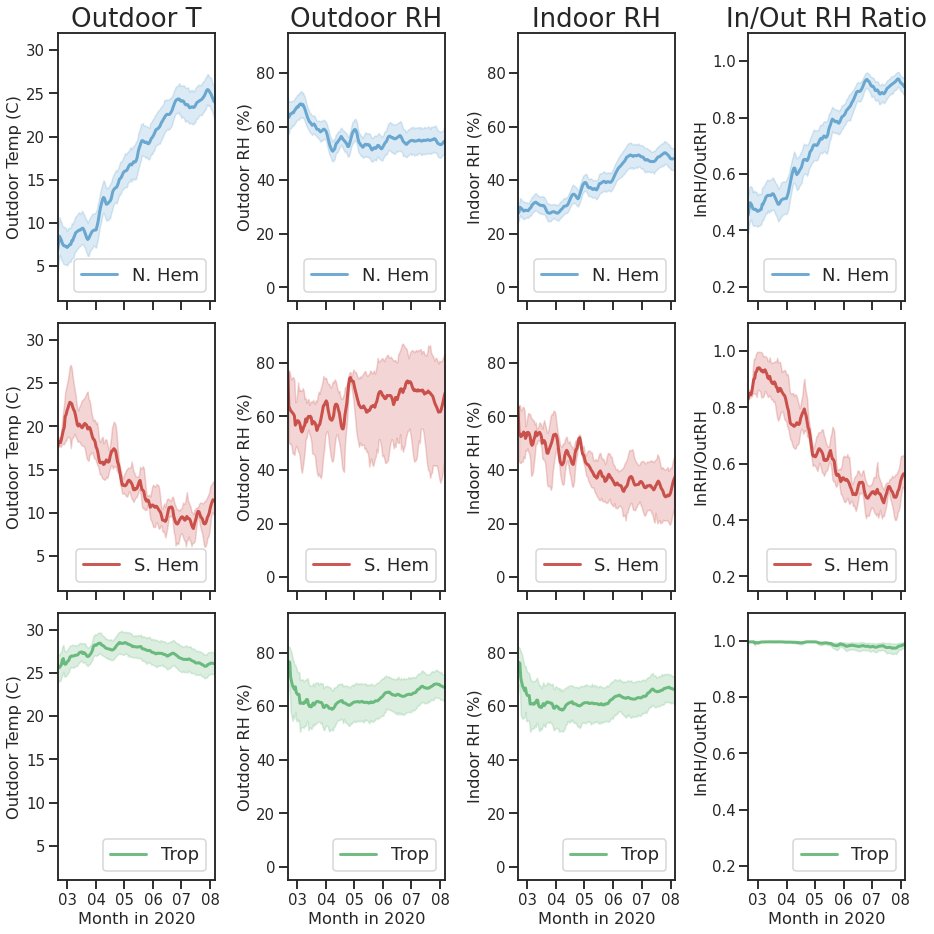

In [ ]:
# Timeseries of outdoor and indoor weather data 

fig,ax = plt.subplots(3,4,sharex='col',sharey='col',figsize=(13,13))

sns.lineplot(x=pd.to_datetime(n_hem['Date'],yearfirst=True,dayfirst=False),y='DailyTemp_C',data=n_hem,ax=ax[0,0],legend=False,color=sns.color_palette(palette='Blues_d',n_colors=4)[1],label='N. Hem',linewidth=3,alpha=0.8); #sns.despine()
sns.lineplot(x=pd.to_datetime(n_hem['Date'],yearfirst=True,dayfirst=False),y='DailyRH_pct',data=n_hem,ax=ax[0,1],legend=False,color=sns.color_palette(palette='Blues_d',n_colors=4)[1],label='N. Hem',linewidth=3,alpha=0.8); #sns.despine()
sns.lineplot(x=pd.to_datetime(n_hem['Date'],yearfirst=True,dayfirst=False),y='IndoorRH_pct',data=n_hem,ax=ax[0,2],legend=False,color=sns.color_palette(palette='Blues_d',n_colors=4)[1],label='N. Hem',linewidth=3,alpha=0.8); #sns.despine()
sns.lineplot(x=pd.to_datetime(n_hem['Date'],yearfirst=True,dayfirst=False),y=n_hem['IndoorRH_pct']/n_hem['DailyRH_pct'],ax=ax[0,3],color=sns.color_palette(palette='Blues_d',n_colors=4)[1],label='N. Hem',linewidth=3,alpha=0.8); #sns.despine()

sns.lineplot(x=pd.to_datetime(s_hem['Date'],yearfirst=True,dayfirst=False),y='DailyTemp_C',data=s_hem,ax=ax[1,0],legend=False,color=sns.color_palette(palette='Reds_d',n_colors=4)[2],label='S. Hem',linewidth=3,alpha=0.8); #sns.despine()
sns.lineplot(x=pd.to_datetime(s_hem['Date'],yearfirst=True,dayfirst=False),y='DailyRH_pct',data=s_hem,ax=ax[1,1],legend=False,color=sns.color_palette(palette='Reds_d',n_colors=4)[2],label='S. Hem',linewidth=3,alpha=0.8); #sns.despine()
sns.lineplot(x=pd.to_datetime(s_hem['Date'],yearfirst=True,dayfirst=False),y='IndoorRH_pct',data=s_hem,ax=ax[1,2],legend=False,color=sns.color_palette(palette='Reds_d',n_colors=4)[2],label='S. Hem',linewidth=3,alpha=0.8); #sns.despine()
sns.lineplot(x=pd.to_datetime(s_hem['Date'],yearfirst=True,dayfirst=False),y=s_hem['IndoorRH_pct']/s_hem['DailyRH_pct'],ax=ax[1,3],color=sns.color_palette(palette='Reds_d',n_colors=4)[2],label='S. Hem',linewidth=3,alpha=0.8); #sns.despine()

sns.lineplot(x=pd.to_datetime(trop['Date'],yearfirst=True,dayfirst=False),y='DailyTemp_C',data=trop,ax=ax[2,0],legend=False,color=sns.color_palette(palette='Greens_d',n_colors=4)[1],label='Trop',linewidth=3,alpha=0.8); #sns.despine()
sns.lineplot(x=pd.to_datetime(trop['Date'],yearfirst=True,dayfirst=False),y='DailyRH_pct',data=trop,ax=ax[2,1],legend=False,color=sns.color_palette(palette='Greens_d',n_colors=4)[1],label='Trop',linewidth=3,alpha=0.8); #sns.despine()
sns.lineplot(x=pd.to_datetime(trop['Date'],yearfirst=True,dayfirst=False),y='IndoorRH_pct',data=trop,ax=ax[2,2],legend=False,color=sns.color_palette(palette='Greens_d',n_colors=4)[1],label='Trop',linewidth=3,alpha=0.8); #sns.despine()
sns.lineplot(x=pd.to_datetime(trop['Date'],yearfirst=True,dayfirst=False),y=trop['IndoorRH_pct']/trop['DailyRH_pct'],ax=ax[2,3],color=sns.color_palette(palette='Greens_d',n_colors=4)[1],label='Trop',linewidth=3,alpha=0.8); #sns.despine()

#[ax[r,c].get_legend().remove() for r in np.arange(0,3) for c in np.arange(0,3)] 

# Place legends 
[ax[0,c].legend(loc='lower right',prop=dict(size=18)) for c in np.arange(0,4)]
[ax[1,c].legend(loc='lower right',prop=dict(size=18)) for c in np.arange(0,4)]
[ax[2,c].legend(loc='lower right',prop=dict(size=18)) for c in np.arange(0,4)]

# Define Y axis limits 
ax[0,0].set_ylim(1,32); ax[0,1].set_ylim(-5,95); ax[0,2].set_ylim(-5,95); ax[0,3].set_ylim(0.15,1.1)

# Define Y axis labels 
[ax[r,0].set_ylabel('Outdoor Temp (C)') for r in np.arange(0,3)]; 
[ax[r,1].set_ylabel('Outdoor RH (%)') for r in np.arange(0,3)]; 
[ax[r,2].set_ylabel('Indoor RH (%)') for r in np.arange(0,3)]; 
[ax[r,3].set_ylabel('InRH/OutRH') for r in np.arange(0,3)]; 

# Define X axis labels 
ax[2,0].set_xlabel('Month in 2020'); ax[2,1].set_xlabel('Month in 2020'); ax[2,2].set_xlabel('Month in 2020'); ax[2,3].set_xlabel('Month in 2020')

ax[0,0].set_title('Outdoor T', fontsize=26)
ax[0,1].set_title('Outdoor RH', fontsize=26)
ax[0,2].set_title('Indoor RH', fontsize=26)
ax[0,3].set_title('In/Out RH Ratio', fontsize=26)

[ax[0,c].set_xlim([datetime.date(2020, 2, 20), datetime.date(2020, 8, 6)]) for c in np.arange(0,4)]
[ax.xaxis.set_major_formatter(md.DateFormatter('%m')) for ax in plt.gcf().axes]; #[ax.tick_params(axis='x',labelrotation=20) for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5, w_pad=0.8, h_pad=0.8)

# from google.colab import files
# filename = ('Figure_Outdoor_Indoor_Climate_Timeseries.png')
# fig.savefig(filename, dpi=500)
# files.download(filename)

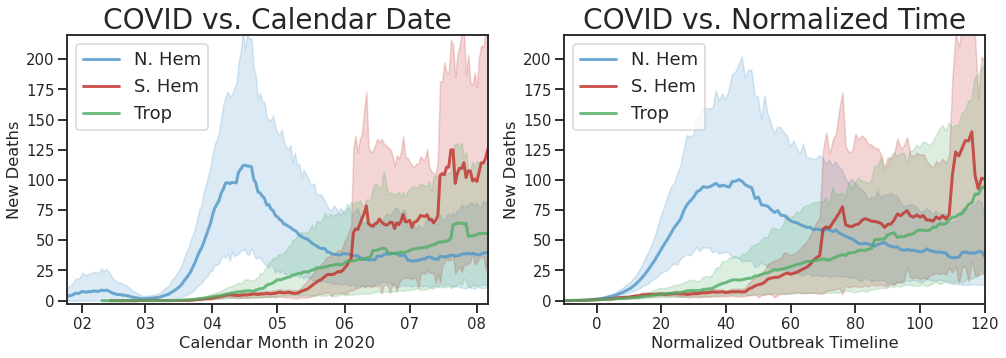

In [ ]:
# Timeseries plots of new deaths and new deaths difference -> broken apart and labeled by region 

# Initialize figure
fig,ax = plt.subplots(1,2,figsize=(14,5))


# New Deaths  
sns.lineplot(x=pd.to_datetime(df7all[df7all['Region']=='n_hem']['Date'],yearfirst=True,dayfirst=False),y='new_deaths',data=df7all[df7all['Region']=='n_hem'],ax=ax[0],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=3,alpha=0.8)
sns.lineplot(x=pd.to_datetime(df7all[df7all['Region']=='s_hem']['Date'],yearfirst=True,dayfirst=False),y='new_deaths',data=df7all[df7all['Region']=='s_hem'],ax=ax[0],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=3,alpha=0.8)
sns.lineplot(x=pd.to_datetime(df7all[df7all['Region']=='trop']['Date'],yearfirst=True,dayfirst=False),y='new_deaths',data=df7all[df7all['Region']=='trop'],ax=ax[0],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=3,alpha=0.8)

sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='n_hem'],ax=ax[1],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=3,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='s_hem'],ax=ax[1],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=3,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='trop'],ax=ax[1],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=3,alpha=0.8)

ax[0].set_title('COVID vs. Calendar Date', fontsize=28); ax[1].set_title('COVID vs. Normalized Time', fontsize=28)
ax[0].set_ylim(-200*0.015,220); ax[1].set_ylim(-200*0.015,220); 
[ax[c].set_ylabel('New Deaths') for c in np.arange(0,2)]

# Shared attributes 
[ax.legend(loc='upper left',prop=dict(size=18)) for ax in plt.gcf().axes]
ax[0].set_xlim([datetime.date(2020, 1, 25), datetime.date(2020, 8, 6)]); ax[0].xaxis.set_major_formatter(md.DateFormatter('%m')) 
ax[1].set_xlim(-10,120)
ax[0].set_xlabel('Calendar Month in 2020'); ax[1].set_xlabel('Normalized Outbreak Timeline')

fig.tight_layout(pad=0.5, w_pad=1, h_pad=0.8)

# from google.colab import files
# filename = ('Figure_NewDeaths_NewDeathsDiff_Timeseries_All_NH_SH_Trop.png')
# fig.savefig(filename, dpi=500)
# files.download(filename) 

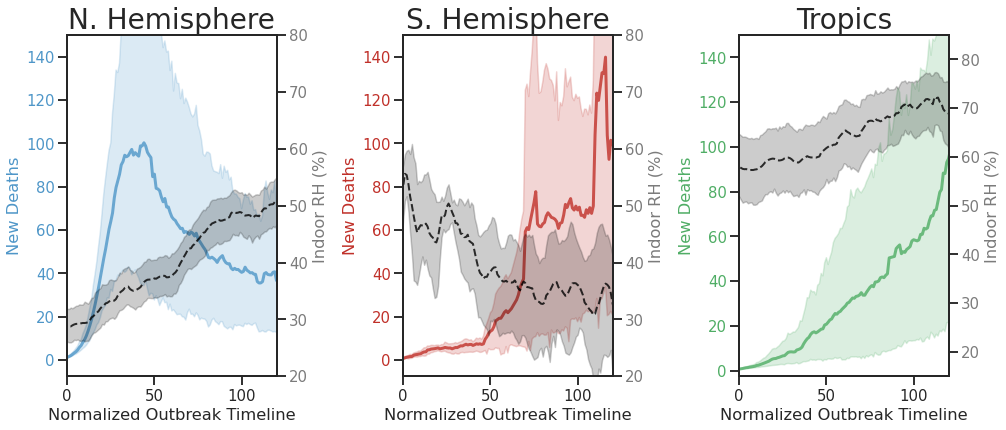

In [ ]:
# Compare new deaths and indoor climate 

fig,ax = plt.subplots(1,3,figsize=(14,6))


# N. Hemisphere 
ax0 = ax[0].twinx()
sns.lineplot(x='Days From 5th Death',y='IndoorRH_pct',data=df7all[df7all['Region']=='n_hem'],ax=ax0,label='Ind RH',color='black',linewidth=2,alpha=0.8)#,style=True,dashes=[(2,2)])
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='n_hem'],ax=ax[0],label='New Deaths',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=3,alpha=0.8)
ax0.set_ylim(20,80)
ax[0].set_ylim(-7.5,150)
# ax0.legend(loc='upper left'); ax[0].legend(loc='lower right')
ax0.lines[0].set_linestyle("--")

# S. Hemisphere 
ax1 = ax[1].twinx()
sns.lineplot(x='Days From 5th Death',y='IndoorRH_pct',data=df7all[df7all['Region']=='s_hem'],ax=ax1,label='Ind RH',color='black',linewidth=2,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='s_hem'],ax=ax[1],label='New Deaths',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=3,alpha=0.8)
ax1.set_ylim(20,80)
ax[1].set_ylim(-7.5,150)
#ax1.legend(loc='upper left'); ax[1].legend(loc='lower right')
ax1.lines[0].set_linestyle("--")


# Trop
ax2 = ax[2].twinx()
sns.lineplot(x='Days From 5th Death',y='IndoorRH_pct',data=df7all[df7all['Region']=='trop'],ax=ax2,label='Ind RH',color='black',linewidth=2,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='trop'],ax=ax[2],label='New Deaths',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=3,alpha=0.8)
ax2.set_ylim(15,85)
ax[2].set_ylim(-2.5,150)
#ax2.legend(loc='upper left'); ax[2].legend(loc='lower right')
ax2.lines[0].set_linestyle("--")


# Labels & Titles 
ax[0].set_title('N. Hemisphere', fontsize=28); ax[1].set_title('S. Hemisphere', fontsize=28); ax[2].set_title('Tropics', fontsize=28)
ax0.set_ylabel('Indoor RH (%)'); ax1.set_ylabel('Indoor RH (%)'); ax2.set_ylabel('Indoor RH (%)')

# Color the right y axes 
ax[0].set_ylabel('New Deaths',color=sns.color_palette(palette='Blues_d',n_colors=4)[1]); ax[1].set_ylabel('New Deaths',color=sns.color_palette(palette='Reds_d',n_colors=4)[2]); ax[2].set_ylabel('New Deaths',color=sns.color_palette(palette='Greens_d',n_colors=4)[1])
ax[0].tick_params(axis='y', labelcolor=sns.color_palette(palette='Blues_d',n_colors=4)[1]); ax[1].tick_params(axis='y', labelcolor=sns.color_palette(palette='Reds_d',n_colors=4)[2]); ax[2].tick_params(axis='y', labelcolor=sns.color_palette(palette='Greens_d',n_colors=4)[1])

# Color the left y axes 
ax0.set_ylabel('Indoor RH (%)',color=sns.color_palette(palette='Greys_d',n_colors=4)[1]); ax1.set_ylabel('Indoor RH (%)',color=sns.color_palette(palette='Greys_d',n_colors=4)[1]); ax2.set_ylabel('Indoor RH (%)',color=sns.color_palette(palette='Greys_d',n_colors=4)[1])
ax0.tick_params(axis='y', labelcolor=sns.color_palette(palette='Greys_d',n_colors=4)[1]);ax1.tick_params(axis='y', labelcolor=sns.color_palette(palette='Greys_d',n_colors=4)[1]);ax2.tick_params(axis='y', labelcolor=sns.color_palette(palette='Greys_d',n_colors=4)[1]);

[ax.get_legend().remove() for ax in plt.gcf().axes] 

[ax.set_xlabel('Normalized Outbreak Timeline') for ax in plt.gcf().axes]
[ax.set_xlim(0,120) for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5, w_pad=1, h_pad=0.8)

# from google.colab import files
# filename = ('Figure_OutbreakMetrics_and_IndoorRH_Timeseries_All_NH_SH_Trop.png')
# fig.savefig(filename, dpi=500)
# files.download(filename) 

# Figure 3

In [ ]:
# Function to create lags of a given variable 

def make_lags(dataframe,merging_var,variable,num_lags):
  df = dataframe[['Country',merging_var,variable]].copy() # Make a copy of the country (for grouping) and the variable to be lagged  

  for i in range(1,num_lags+1):
    df[variable+'_lag{}'.format(i)] = df.groupby('Country')[variable].shift(i) # Create all of the lags of the given input variable 

  return df

In [ ]:
# Function to create a dataframe with lagged versions of the variable and the actual outbreak metrics 

def lagged_var_df(dataframe,merging_var,variable,num_lags,COVIDstats):

  df = dataframe.copy()

  outcomes = df[COVIDstats]

  lagged_variables = make_lags(dataframe,merging_var,variable,num_lags)

  merged = lagged_variables.merge(right=outcomes,how='left',on=['Country',merging_var])

  return merged

In [ ]:
# Create a dataframe with lagged indoor humidity (from 0 days of lag up to 28 days of lag)
COVIDstats = ['Country','Days From 5th Death','total_cases', 'total_cases_per_million', 'new_cases', # Add country and date so there can be correct merging on keys 
       'new_cases_per_million', 'total_deaths', 'total_deaths_per_million',
       'total_deaths_pctchange', 'total_deaths_per_million_pctchange',
       'new_deaths', 'new_deaths_per_million', 'new_deaths_diff',
       'new_deaths_per_million_diff', 'new_deaths_pctchange',
       'new_deaths_per_million_pctchange']

df7all_lag_indrh = lagged_var_df(df7all,'Days From 5th Death','IndoorRH_pct',28,COVIDstats)

In [ ]:
# #all_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120)] 
# nhem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120) & (df7all_lag_indrh['Country'].isin(n_hem['Country'].unique()))]
# shem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120) & (df7all_lag_indrh['Country'].isin(s_hem['Country'].unique()))]
# trop_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120) & (df7all_lag_indrh['Country'].isin(trop['Country'].unique()))]

# outcomes = ['new_deaths','new_deaths_diff','new_deaths_pctchange']
# rows = 3; cols = len(outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,16))

# # Go through each quantized outbreak metric and make plots 
# for col in range(0,cols): 

#   # Robust for n hem countries 
#   sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],robust=True,n_boot=100,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[0])
#   sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],robust=True,n_boot=100,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[1]) 
#   sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],robust=True,n_boot=100,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[2])
#   sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],robust=True,n_boot=100,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[3])

#   # Robust for s hem countries 
#   sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=shem_forplot,ax=ax[1,col],robust=True,n_boot=100,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[0])
#   sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=shem_forplot,ax=ax[1,col],robust=True,n_boot=100,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[1]) 
#   sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=shem_forplot,ax=ax[1,col],robust=True,n_boot=100,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[2])
#   sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=shem_forplot,ax=ax[1,col],robust=True,n_boot=100,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[3])

#   # Robust for trop countries 
#   sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=trop_forplot,ax=ax[2,col],robust=True,n_boot=100,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[0])
#   sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=trop_forplot,ax=ax[2,col],robust=True,n_boot=100,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[1]) 
#   sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=trop_forplot,ax=ax[2,col],robust=True,n_boot=100,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[2])
#   sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=trop_forplot,ax=ax[2,col],robust=True,n_boot=100,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[3])

# [ax[r,2].legend(loc='upper right') for r in np.arange(0,2)]; ax[2,2].legend(loc='lower right') 

# [ax.set_xlim(0,100) for ax in plt.gcf().axes]

# [ax[r,0].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]
# [ax[r,1].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]
# [ax[r,2].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]

# [ax[r,0].set_ylabel('New Deaths') for r in np.arange(0,3)]
# [ax[r,1].set_ylabel('New Deaths Difference') for r in np.arange(0,3)]
# [ax[r,2].set_ylabel('New Deaths % Change') for r in np.arange(0,3)]

# ax[0,0].set_title('New COVID Deaths\nN. Hem - Robust Fit', fontsize=28)
# ax[0,1].set_title('New Deaths Diff.\nN. Hem - Robust Fit', fontsize=28)
# ax[0,2].set_title('New Deaths % Change\nN. Hem - Robust Fit', fontsize=28)

# ax[1,0].set_title('S. Hem - Robust Fit', fontsize=28)
# ax[1,1].set_title('S. Hem - Robust Fit', fontsize=28)
# ax[1,2].set_title('S. Hem - Robust Fit', fontsize=28)

# ax[2,0].set_title('Trop - Robust Fit', fontsize=28)
# ax[2,1].set_title('Trop - Robust Fit', fontsize=28)
# ax[2,2].set_title('Trop - Robust Fit', fontsize=28)

# fig.tight_layout(pad=0.5,h_pad=1,w_pad=1)

# # from google.colab import files
# # filename = ('Figure_Robust_DroppedCases_NH_SH_Trop.png')
# # fig.savefig(filename, dpi=500)
# # files.download(filename) 

In [ ]:
def lowess_with_ci(dataset, xcol, ycol, n_boot, ):
  
  # Import statsmodels api and instantiate the lowess model 
  import statsmodels.api as sm; lowess = sm.nonparametric.lowess

  # Get input and output data vectors 
  df = dataset.dropna().copy(); input=df[xcol]; output=df[ycol] 

  # Dataframe to be used for index matching (bootstrapping uses sampling with replacement, so you'll have duplicates of some indices and missing values at other indices, need a way to match back with original df)
  df_for_index_matching = df[input.name].reset_index()

  # Number of bootstraps and number of samples for each bootstrap (equal to number of samples in vector) 
  n_boot=5; n=len(output)

  bootstrapped_lowess_fits = [] # to hold all of the index-matched lowess fits on the resampled datasets 
  rng = np.random.default_rng(None) # random number generator 
  for i in range(int(n_boot)): 
    resampler = rng.integers(0, n, n, dtype=np.intp) # get random indices -> use these to extract index-matched pairs of xvals and yvals from your input and output vectors 

    resampled_output = output.take(resampler, axis=0) # extract resampled outputs (w/ replacement)

    resampled_input = input.take(resampler, axis=0) # extract resampled inputs (w/ replacement)

    lowess_on_resampled_data = lowess(endog=resampled_output,exog=resampled_input) # use resampled (w/ replacement) dataset to compute a new lowess fit 

    lowess_on_resampled_data_df = pd.DataFrame(data=lowess_on_resampled_data,columns=['input','predicted_output']).set_index('input').drop_duplicates().reset_index() # turn the array into a labeled dataframe and drop duplicated inputs (since you sample with replacement, you'll have duplicated inputs)

    lowess_matched_to_original_data_indices = df_for_index_matching.merge(lowess_on_resampled_data_df.rename(columns={'input':input.name}),how='left')['predicted_output'] # Use the original data vector to match the lowess to the right indices (since you sample with replacement and therefore don't use all of the unique input values)

    bootstrapped_lowess_fits.append(lowess_matched_to_original_data_indices) # Add the index-matched lowess fit to the list 

  full_lowess = pd.DataFrame(lowess(endog=output,exog=input),columns=[input.name,'predicted_output_full']) # final lowess fitting on the entire dataset (no bootstrapping/resampling, use all datapoints once) 

  full_lowess = df_for_index_matching.merge(full_lowess,how='left',on=input.name).drop(columns='index') # Need to match the lowess results to the right index (and corresponding input value) 

  lowess_with_bootstrap = pd.concat([full_lowess,pd.concat(bootstrapped_lowess_fits,axis=1)],axis=1) # Combine the full (all datapoints) lowess fit with the bootstrapped (subsampled) lowess fits 

  lowess_with_bootstrap.loc[:,'uppercl'] = lowess_with_bootstrap.iloc[:,1:].quantile(q=0.975,axis=1) # get the 97.5 percentile for the bootstrapped fits (upper bound for 95% ci)

  lowess_with_bootstrap.loc[:,'lowercl'] = lowess_with_bootstrap.iloc[:,1:].quantile(q=0.025,axis=1) # get the 2.5 percentile for the bootstrapped fits (lower bound for 95% ci)

  lowess_with_bootstrap.sort_values(by=input.name,inplace=True) # sort the values by input so that the fill_between function works properly 

  from scipy.signal import savgol_filter

  lowess_with_bootstrap.loc[:,'uppercl_smooth'] = savgol_filter(lowess_with_bootstrap['uppercl'], 15, 2) # smooth the upper confidence interval 

  lowess_with_bootstrap.loc[:,'lowercl_smooth'] = savgol_filter(lowess_with_bootstrap['lowercl'], 15, 2) # smooth the lower confidence interval 

  return lowess_with_bootstrap[[input.name,'predicted_output_full','uppercl','lowercl','uppercl_smooth','lowercl_smooth']]

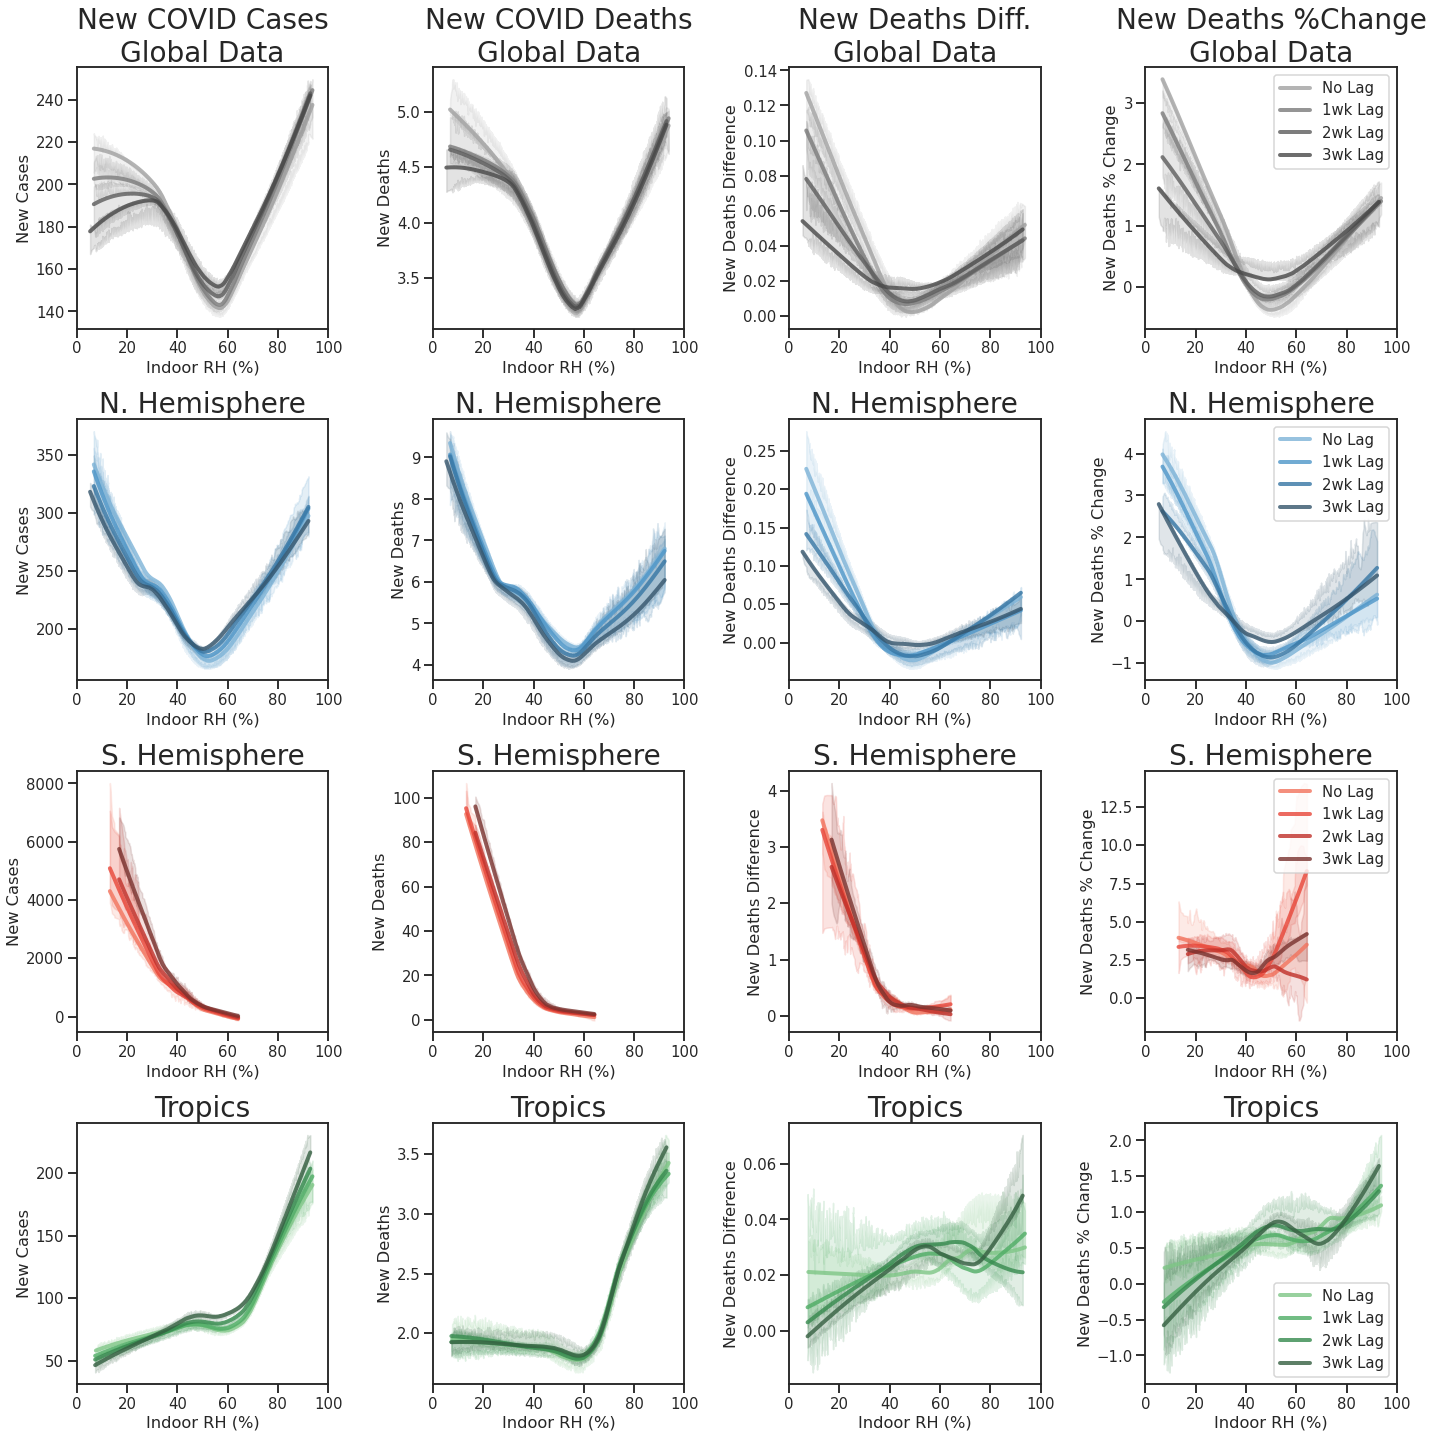

In [ ]:
all_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120)] 
nhem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120) & (df7all_lag_indrh['Country'].isin(n_hem['Country'].unique()))]
shem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120) & (df7all_lag_indrh['Country'].isin(s_hem['Country'].unique()))]
trop_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120) & (df7all_lag_indrh['Country'].isin(trop['Country'].unique()))]

outcomes = ['new_cases','new_deaths','new_deaths_diff','new_deaths_pctchange']
rows = 4; cols = len(outcomes); fig,ax=plt.subplots(rows,cols,figsize=(20,20))

# Go through each quantized outbreak metric and make plots 
for col in range(0,cols): 

  n_boot = 100; # Number of bootstraps to complete for each lowess fit 

  # LOWESS for pooled global dataset 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=all_forplot,ax=ax[0,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[0])
  lowess_conf_intervals = lowess_with_ci(dataset=all_forplot, xcol='IndoorRH_pct', ycol=outcomes[col], n_boot=n_boot)
  ax[0,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greys_d',n_colors=4)[0])

  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=all_forplot,ax=ax[0,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[1]) 
  lowess_conf_intervals = lowess_with_ci(dataset=all_forplot, xcol='IndoorRH_pct_lag7', ycol=outcomes[col], n_boot=n_boot)
  ax[0,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag7'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greys_d',n_colors=4)[1])

  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=all_forplot,ax=ax[0,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[2])
  lowess_conf_intervals = lowess_with_ci(dataset=all_forplot, xcol='IndoorRH_pct_lag14', ycol=outcomes[col], n_boot=n_boot)
  ax[0,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag14'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greys_d',n_colors=4)[2])

  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=all_forplot,ax=ax[0,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[3])
  lowess_conf_intervals = lowess_with_ci(dataset=all_forplot, xcol='IndoorRH_pct_lag21', ycol=outcomes[col], n_boot=n_boot)
  ax[0,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag21'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greys_d',n_colors=4)[3])


  # LOWESS for n hem countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=nhem_forplot,ax=ax[1,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[0])
  lowess_conf_intervals = lowess_with_ci(dataset=nhem_forplot, xcol='IndoorRH_pct', ycol=outcomes[col], n_boot=n_boot)
  ax[1,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Blues_d',n_colors=4)[0])

  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=nhem_forplot,ax=ax[1,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[1]) 
  lowess_conf_intervals = lowess_with_ci(dataset=nhem_forplot, xcol='IndoorRH_pct_lag7', ycol=outcomes[col], n_boot=n_boot)
  ax[1,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag7'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Blues_d',n_colors=4)[1])

  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=nhem_forplot,ax=ax[1,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[2])
  lowess_conf_intervals = lowess_with_ci(dataset=nhem_forplot, xcol='IndoorRH_pct_lag14', ycol=outcomes[col], n_boot=n_boot)
  ax[1,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag14'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Blues_d',n_colors=4)[2])

  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=nhem_forplot,ax=ax[1,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[3])
  lowess_conf_intervals = lowess_with_ci(dataset=nhem_forplot, xcol='IndoorRH_pct_lag21', ycol=outcomes[col], n_boot=n_boot)
  ax[1,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag21'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Blues_d',n_colors=4)[3])


  # LOWESS for s hem countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=shem_forplot,ax=ax[2,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[0])
  lowess_conf_intervals = lowess_with_ci(dataset=shem_forplot, xcol='IndoorRH_pct', ycol=outcomes[col], n_boot=n_boot)
  ax[2,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Reds_d',n_colors=4)[0])

  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=shem_forplot,ax=ax[2,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[1]) 
  lowess_conf_intervals = lowess_with_ci(dataset=shem_forplot, xcol='IndoorRH_pct_lag7', ycol=outcomes[col], n_boot=n_boot)
  ax[2,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag7'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Reds_d',n_colors=4)[1])

  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=shem_forplot,ax=ax[2,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[2])
  lowess_conf_intervals = lowess_with_ci(dataset=shem_forplot, xcol='IndoorRH_pct_lag14', ycol=outcomes[col], n_boot=n_boot)
  ax[2,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag14'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Reds_d',n_colors=4)[2])

  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=shem_forplot,ax=ax[2,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[3])
  lowess_conf_intervals = lowess_with_ci(dataset=shem_forplot, xcol='IndoorRH_pct_lag21', ycol=outcomes[col], n_boot=n_boot)
  ax[2,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag21'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Reds_d',n_colors=4)[3])


  # LOWESS for trop countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=trop_forplot,ax=ax[3,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[0])
  lowess_conf_intervals = lowess_with_ci(dataset=trop_forplot, xcol='IndoorRH_pct', ycol=outcomes[col], n_boot=n_boot)
  ax[3,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greens_d',n_colors=4)[0])

  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=trop_forplot,ax=ax[3,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[1]) 
  lowess_conf_intervals = lowess_with_ci(dataset=trop_forplot, xcol='IndoorRH_pct_lag7', ycol=outcomes[col], n_boot=n_boot)
  ax[3,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag7'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greens_d',n_colors=4)[1])

  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=trop_forplot,ax=ax[3,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[2])
  lowess_conf_intervals = lowess_with_ci(dataset=trop_forplot, xcol='IndoorRH_pct_lag14', ycol=outcomes[col], n_boot=n_boot)
  ax[3,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag14'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greens_d',n_colors=4)[2])

  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=trop_forplot,ax=ax[3,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[3])
  lowess_conf_intervals = lowess_with_ci(dataset=trop_forplot, xcol='IndoorRH_pct_lag21', ycol=outcomes[col], n_boot=n_boot)
  ax[3,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag21'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greens_d',n_colors=4)[3])


[ax[r,3].legend(loc='upper right') for r in np.arange(0,3)]; ax[3,3].legend(loc='lower right') 

[ax.set_xlim(0,100) for ax in plt.gcf().axes]

[ax[r,0].set_xlabel('Indoor RH (%)') for r in np.arange(0,4)]
[ax[r,1].set_xlabel('Indoor RH (%)') for r in np.arange(0,4)]
[ax[r,2].set_xlabel('Indoor RH (%)') for r in np.arange(0,4)]
[ax[r,3].set_xlabel('Indoor RH (%)') for r in np.arange(0,4)]

[ax[r,0].set_ylabel('New Cases') for r in np.arange(0,4)]
[ax[r,1].set_ylabel('New Deaths') for r in np.arange(0,4)]
[ax[r,2].set_ylabel('New Deaths Difference') for r in np.arange(0,4)]
[ax[r,3].set_ylabel('New Deaths % Change') for r in np.arange(0,4)]

ax[0,0].set_title('New COVID Cases\nGlobal Data', fontsize=28)
ax[0,1].set_title('New COVID Deaths\nGlobal Data', fontsize=28)
ax[0,2].set_title('New Deaths Diff.\nGlobal Data', fontsize=28)
ax[0,3].set_title('New Deaths %Change\nGlobal Data', fontsize=28)

ax[1,0].set_title('N. Hemisphere', fontsize=28)
ax[1,1].set_title('N. Hemisphere', fontsize=28)
ax[1,2].set_title('N. Hemisphere', fontsize=28)
ax[1,3].set_title('N. Hemisphere', fontsize=28)

ax[2,0].set_title('S. Hemisphere', fontsize=28)
ax[2,1].set_title('S. Hemisphere', fontsize=28)
ax[2,2].set_title('S. Hemisphere', fontsize=28)
ax[2,3].set_title('S. Hemisphere', fontsize=28)

ax[3,0].set_title('Tropics', fontsize=28)
ax[3,1].set_title('Tropics', fontsize=28)
ax[3,2].set_title('Tropics', fontsize=28)
ax[3,3].set_title('Tropics', fontsize=28)

fig.tight_layout(pad=0.5,h_pad=1,w_pad=1)

# from google.colab import files
# filename = ('Figure_LOWESS_DroppedCases_NH_SH_Trop_WITHConfIntervals.png')
# fig.savefig(filename, dpi=500)
# files.download(filename) 

In [ ]:
# #all_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120)] 
# nhem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120) & (df7all_lag_indrh['Country'].isin(n_hem['Country'].unique()))]
# shem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120) & (df7all_lag_indrh['Country'].isin(s_hem['Country'].unique()))]
# trop_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120) & (df7all_lag_indrh['Country'].isin(trop['Country'].unique()))]

# outcomes = ['new_deaths','new_deaths_diff','new_deaths_pctchange']
# rows = 3; cols = len(outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,16))

# # Go through each quantized outbreak metric and make plots 
# for col in range(0,cols): 

#   n_boot = 100; # Number of bootstraps to complete for each lowess fit 

#   # LOWESS for n hem countries 
#   sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[0])
#   lowess_conf_intervals = lowess_with_ci(dataset=nhem_forplot, xcol='IndoorRH_pct', ycol=outcomes[col], n_boot=n_boot)
#   ax[0,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Blues_d',n_colors=4)[0])

#   sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[1]) 
#   lowess_conf_intervals = lowess_with_ci(dataset=nhem_forplot, xcol='IndoorRH_pct_lag7', ycol=outcomes[col], n_boot=n_boot)
#   ax[0,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag7'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Blues_d',n_colors=4)[1])

#   sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[2])
#   lowess_conf_intervals = lowess_with_ci(dataset=nhem_forplot, xcol='IndoorRH_pct_lag14', ycol=outcomes[col], n_boot=n_boot)
#   ax[0,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag14'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Blues_d',n_colors=4)[2])

#   sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[3])
#   lowess_conf_intervals = lowess_with_ci(dataset=nhem_forplot, xcol='IndoorRH_pct_lag21', ycol=outcomes[col], n_boot=n_boot)
#   ax[0,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag21'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Blues_d',n_colors=4)[3])

#   # LOWESS for s hem countries 
#   sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=shem_forplot,ax=ax[1,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[0])
#   lowess_conf_intervals = lowess_with_ci(dataset=shem_forplot, xcol='IndoorRH_pct', ycol=outcomes[col], n_boot=n_boot)
#   ax[1,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Reds_d',n_colors=4)[0])

#   sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=shem_forplot,ax=ax[1,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[1]) 
#   lowess_conf_intervals = lowess_with_ci(dataset=shem_forplot, xcol='IndoorRH_pct_lag7', ycol=outcomes[col], n_boot=n_boot)
#   ax[1,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag7'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Reds_d',n_colors=4)[1])

#   sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=shem_forplot,ax=ax[1,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[2])
#   lowess_conf_intervals = lowess_with_ci(dataset=shem_forplot, xcol='IndoorRH_pct_lag14', ycol=outcomes[col], n_boot=n_boot)
#   ax[1,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag14'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Reds_d',n_colors=4)[2])

#   sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=shem_forplot,ax=ax[1,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[3])
#   lowess_conf_intervals = lowess_with_ci(dataset=shem_forplot, xcol='IndoorRH_pct_lag21', ycol=outcomes[col], n_boot=n_boot)
#   ax[1,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag21'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Reds_d',n_colors=4)[3])


#   # LOWESS for trop countries 
#   sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=trop_forplot,ax=ax[2,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[0])
#   lowess_conf_intervals = lowess_with_ci(dataset=trop_forplot, xcol='IndoorRH_pct', ycol=outcomes[col], n_boot=n_boot)
#   ax[2,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greens_d',n_colors=4)[0])

#   sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=trop_forplot,ax=ax[2,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[1]) 
#   lowess_conf_intervals = lowess_with_ci(dataset=trop_forplot, xcol='IndoorRH_pct_lag7', ycol=outcomes[col], n_boot=n_boot)
#   ax[2,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag7'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greens_d',n_colors=4)[1])

#   sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=trop_forplot,ax=ax[2,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[2])
#   lowess_conf_intervals = lowess_with_ci(dataset=trop_forplot, xcol='IndoorRH_pct_lag14', ycol=outcomes[col], n_boot=n_boot)
#   ax[2,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag14'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greens_d',n_colors=4)[2])

#   sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=trop_forplot,ax=ax[2,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[3])
#   lowess_conf_intervals = lowess_with_ci(dataset=trop_forplot, xcol='IndoorRH_pct_lag21', ycol=outcomes[col], n_boot=n_boot)
#   ax[2,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag21'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greens_d',n_colors=4)[3])

# [ax[r,2].legend(loc='upper right') for r in np.arange(0,2)]; ax[2,2].legend(loc='lower right') 

# [ax.set_xlim(0,100) for ax in plt.gcf().axes]

# [ax[r,0].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]
# [ax[r,1].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]
# [ax[r,2].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]

# [ax[r,0].set_ylabel('New Deaths') for r in np.arange(0,3)]
# [ax[r,1].set_ylabel('New Deaths Difference') for r in np.arange(0,3)]
# [ax[r,2].set_ylabel('New Deaths % Change') for r in np.arange(0,3)]

# ax[0,0].set_title('New COVID Deaths\nN. Hem - LOWESS Fit', fontsize=28)
# ax[0,1].set_title('New Deaths Diff.\nN. Hem - LOWESS Fit', fontsize=28)
# ax[0,2].set_title('New Deaths % Change\nN. Hem - LOWESS Fit', fontsize=28)

# ax[1,0].set_title('S. Hem - LOWESS Fit', fontsize=28)
# ax[1,1].set_title('S. Hem - LOWESS Fit', fontsize=28)
# ax[1,2].set_title('S. Hem - LOWESS Fit', fontsize=28)

# ax[2,0].set_title('Trop - LOWESS Fit', fontsize=28)
# ax[2,1].set_title('Trop - LOWESS Fit', fontsize=28)
# ax[2,2].set_title('Trop - LOWESS Fit', fontsize=28)

# fig.tight_layout(pad=0.5,h_pad=1,w_pad=1)

# # from google.colab import files
# # filename = ('Figure_LOWESS_DroppedCases_NH_SH_Trop_WITHConfIntervals.png')
# # fig.savefig(filename, dpi=500)
# # files.download(filename) 

# Figure 4

In [ ]:
def quantizer(dataframe, first_day, last_day, qlevels, countries, retbins):

  # Dataframe to use for plotting -> Set lower and upper bound for days from 5th death, only use the selected list of countries (could be all, n_hem, s_hem, trop, or for a given month)
  df = dataframe[(dataframe['Days From 5th Death'].ge(first_day)) & (dataframe['Days From 5th Death'].le(last_day)) & (dataframe['Country'].isin(countries))].copy()

  if retbins == True: # return the bin ranges and label each category with the bin range 
    # Apply qcut to break the outbreak metrics into different evenly-distributed quantiles 
    df.loc[:,'new_cases_Qlevels'] = pd.qcut(x=df.loc[:,'new_cases'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_diff_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_diff'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_pctchange_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_pctchange'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
  
  else: # don't retun the bin ranges and label each category with an integer
    # Apply qcut to break the outbreak metrics into different evenly-distributed quantiles 
    df.loc[:,'new_cases_Qlevels'] = pd.qcut(x=df.loc[:,'new_cases'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_diff_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_diff'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_pctchange_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_pctchange'],q=qlevels,duplicates='drop',labels=False).astype('category')

  return df

In [ ]:
# Function for changing seaborn barplot width 
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [ ]:
# To examine the quantization cutoffs for the regions 
print('Northern Hemisphere\n')
a = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(),retbins=True).iloc[:,-4:]
for col in a:
  print(col); print(a[col].unique()); print('\n')

print('Southern Hemisphere\n')
a = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(),retbins=True).iloc[:,-4:]
for col in a:
  print(col); print(a[col].unique()); print('\n')

print('Tropics\n')
a = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(),retbins=True).iloc[:,-4:]
for col in a:
  print(col); print(a[col].unique()); print('\n')

Northern Hemisphere

new_cases_Qlevels
[(-0.1, 172.4], (172.4, 45367.0], NaN]
Categories (2, interval[float64]): [(-0.1, 172.4] < (172.4, 45367.0]]


new_deaths_Qlevels
[(-0.1, 4.0], (4.0, 2715.1], NaN]
Categories (2, interval[float64]): [(-0.1, 4.0] < (4.0, 2715.1]]


new_deaths_diff_Qlevels
[(-458.20000000000005, 0.0], (0.0, 429.4], NaN]
Categories (2, interval[float64]): [(-458.20000000000005, 0.0] < (0.0, 429.4]]


new_deaths_pctchange_Qlevels
[(-100.1, 0.0], (0.0, 1000.0], NaN]
Categories (2, interval[float64]): [(-100.1, 0.0] < (0.0, 1000.0]]


Southern Hemisphere

new_cases_Qlevels
[(5.5, 438.4], (438.4, 12583.7]]
Categories (2, interval[float64]): [(5.5, 438.4] < (438.4, 12583.7]]


new_deaths_Qlevels
[(-0.1, 8.9], (8.9, 270.6]]
Categories (2, interval[float64]): [(-0.1, 8.9] < (8.9, 270.6]]


new_deaths_diff_Qlevels
[(0.1, 136.9], (-140.2, 0.1]]
Categories (2, interval[float64]): [(-140.2, 0.1] < (0.1, 136.9]]


new_deaths_pctchange_Qlevels
[(1.4, 157.6], (-100.1, 1.4]]
Catego

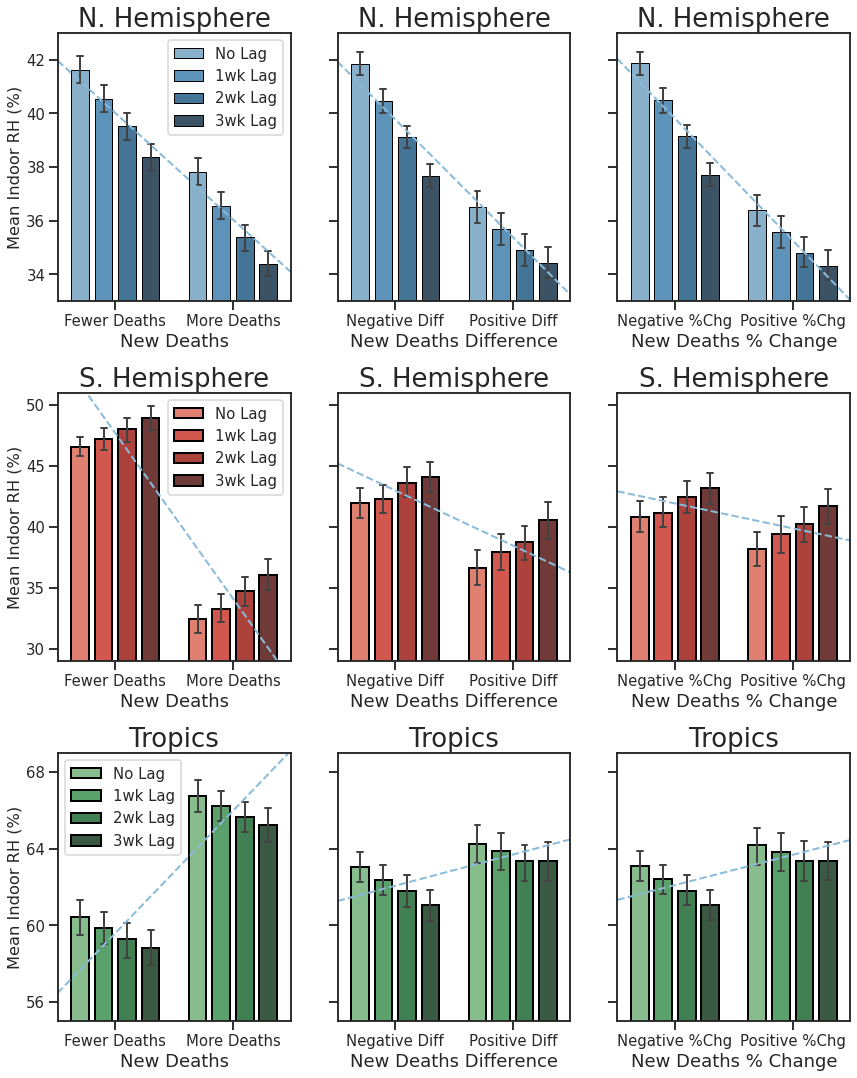

In [ ]:
first_day = 0; last_day = 120; qlevels = 2; # Parameters for quantizing the dataset 

qtotal = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False) # quantize all outbreaks
qnhem = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(), retbins=False) # quantize the N. Hem outbreaks 
qshem = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(), retbins=False) # quantize the S. Hem outbreaks 
qtrop = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(), retbins=False) # quantize the Trop outbreaks 


# Set up the plotting 
quantized_outcomes = ['new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
rows = 3; cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(12,15),sharey='row')

# Go through each quantized outbreak metric and make plots 
for col in range(0,cols): 

  # Northern hemisphere colored bar plots and best fit 
  meltnhem = pd.melt(qnhem, id_vars=quantized_outcomes[col], value_vars=['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21'])
  sns.barplot(x=quantized_outcomes[col], y='value', hue='variable', data=meltnhem,ax=ax[0,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=1,palette=sns.color_palette(palette='Blues_d',n_colors=4))
  sns.regplot(x=np.arange(0,len(meltnhem[quantized_outcomes[col]].cat.categories)),y=meltnhem.groupby(quantized_outcomes[col])['value'].mean().values,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[0,col],truncate=False)

  # Southern hemisphere colored bar plots and best fit 
  meltshem = pd.melt(qshem, id_vars=quantized_outcomes[col], value_vars=['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21'])
  sns.barplot(x=quantized_outcomes[col], y='value', hue='variable', data=meltshem,ax=ax[1,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Reds_d',n_colors=4))
  sns.regplot(x=np.arange(0,len(meltshem[quantized_outcomes[col]].cat.categories)),y=meltshem.groupby(quantized_outcomes[col])['value'].mean().values,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[1,col],truncate=False)

  # Tropical colored bar plots and best fit 
  melttrop = pd.melt(qtrop, id_vars=quantized_outcomes[col], value_vars=['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21'])
  sns.barplot(x=quantized_outcomes[col], y='value', hue='variable', data=melttrop,ax=ax[2,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Greens_d',n_colors=4))
  sns.regplot(x=np.arange(0,len(melttrop[quantized_outcomes[col]].cat.categories)),y=melttrop.groupby(quantized_outcomes[col])['value'].mean().values,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[2,col],truncate=False)

# Define custom plotting legends 
# Remove legends in the first 3 plots for all 3 rows 
[ax[r,c].get_legend().remove() for r in np.arange(0,3) for c in np.arange(0,3)] 
#[ax[r,c].get_legend().remove() for r in np.arange(0,1) for c in np.arange(0,3)] 


# Get handles and labels information for the legend, then use these same handles and specify custom label names and custom label location in the subsequent line
handles, labels = ax[0,0].get_legend_handles_labels(); ax[0,0].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],loc='upper right')
handles, labels = ax[1,0].get_legend_handles_labels(); ax[1,0].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],loc='upper right')
handles, labels = ax[2,0].get_legend_handles_labels(); ax[2,0].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],loc='upper left')


# Define xlabels 
[ax[r,0].set_xlabel('New Deaths', fontsize=18) for r in np.arange(0,3)]; [ax[r,1].set_xlabel('New Deaths Difference', fontsize=18) for r in np.arange(0,3)]
[ax[r,2].set_xlabel('New Deaths % Change', fontsize=18) for r in np.arange(0,3)]; #[ax[r,3].set_xlabel('Quantiles: New Deaths % Change') for r in np.arange(0,4)]

# Define ylabels 
#[ax.set_ylabel('Indoor RH (%)') for ax in plt.gcf().axes]
[ax[r,c].set_ylabel('') for r in np.arange(0,3) for c in np.arange(1,3)]
[ax[r,0].set_ylabel('Mean Indoor RH (%)') for r in np.arange(0,3)]

# Define titles
#[ax[0,c].set_title('All Countries') for c in np.arange(0,3)]
[ax[0,c].set_title('N. Hemisphere', fontsize=26) for c in np.arange(0,3)]
[ax[1,c].set_title('S. Hemisphere', fontsize=26) for c in np.arange(0,3)]
[ax[2,c].set_title('Tropics', fontsize=26) for c in np.arange(0,3)]

# Define ylims 
#[ax[0,c].set_ylim(42,52) for c in np.arange(0,3)]
[ax[0,c].set_ylim(33,43) for c in np.arange(0,3)]
[ax[1,c].set_ylim(29,51) for c in np.arange(0,3)]
[ax[2,c].set_ylim(55,69) for c in np.arange(0,3)]
ax[1,0].set_yticks([30,35,40,45,50]); ax[2,0].set_yticks([56,60,64,68])
#[ax.set_xticklabels(['Better','Worse']) for ax in plt.gcf().axes]
[ax[r,0].set_xticklabels(['Fewer Deaths','More Deaths']) for r in np.arange(0,3)]
[ax[r,1].set_xticklabels(['Negative Diff','Positive Diff']) for r in np.arange(0,3)]
[ax[r,2].set_xticklabels(['Negative %Chg','Positive %Chg']) for r in np.arange(0,3)]

[change_width(ax, 0.15) for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5,h_pad=1,w_pad=2)

# from google.colab import files
# filename = ('Figure_OutbreakQuantiles_Barplots_DroppedCases_NH_SH_Tr.png')
# fig.savefig(filename, dpi=500)
# files.download(filename) 

In [ ]:
# Test bar chart data for normality before hypothesis testing... 

from scipy import stats
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution
quantized_outcomes = ['new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_regions = [qnhem, qshem, qtrop]
region_names = ['NH','SH','Trop']
lagged_rhvals =['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21']
counter=0
for region in quantized_regions: 
  for outcome in quantized_outcomes: 
    for rhval in lagged_rhvals: 
      print('Region:',region_names[counter],'| Quantized Outcome:',outcome,'| Lagged Indoor RH:',rhval)
      less_severe_outcomes = region[region[outcome]==0][rhval]
      shapiro_less_severe = stats.shapiro(less_severe_outcomes.dropna())
      if shapiro_less_severe[1]>0.05:
        print('  +++ RH vals for less severe outcomes are normally distributed, pval=',shapiro_less_severe[1])
      else: 
        print('  --- RH vals for less severe outcomes are NOT normally distributed, pval=',shapiro_less_severe[1])
      more_severe_outcomes = region[region[outcome]==1][rhval]
      shapiro_more_severe = stats.shapiro(more_severe_outcomes.dropna())
      if shapiro_more_severe[1]>0.05:
        print('  +++ RH vals for more severe outcomes are normally distributed, pval=',shapiro_more_severe[1])
      else: 
        print('  --- RH vals for more severe outcomes are NOT normally distributed, pval=',shapiro_more_severe[1])
  counter+=1

Region: NH | Quantized Outcome: new_deaths_Qlevels | Lagged Indoor RH: IndoorRH_pct
  --- RH vals for less severe outcomes are NOT normally distributed, pval= 8.868918610519217e-25
  --- RH vals for more severe outcomes are NOT normally distributed, pval= 2.3734629632631468e-24
Region: NH | Quantized Outcome: new_deaths_Qlevels | Lagged Indoor RH: IndoorRH_pct_lag7
  --- RH vals for less severe outcomes are NOT normally distributed, pval= 2.526966457711827e-26
  --- RH vals for more severe outcomes are NOT normally distributed, pval= 1.8007458461530266e-27
Region: NH | Quantized Outcome: new_deaths_Qlevels | Lagged Indoor RH: IndoorRH_pct_lag14
  --- RH vals for less severe outcomes are NOT normally distributed, pval= 7.972791450079284e-27
  --- RH vals for more severe outcomes are NOT normally distributed, pval= 8.932064354384201e-31
Region: NH | Quantized Outcome: new_deaths_Qlevels | Lagged Indoor RH: IndoorRH_pct_lag21
  --- RH vals for less severe outcomes are NOT normally distrib

In [ ]:
# Hypothesis test of bar chart data (mann whitney since the data is non-normally distributed)

from scipy import stats
# Mann Whitney tests whether the distributions of two independent samples are equal or not. Wilcoxon tests whether the distributions of two paired samples are equal or not.
quantized_outcomes = ['new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_regions = [qnhem, qshem, qtrop]
region_names = ['NH','SH','Trop']
lagged_rhvals =['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21']
# print('Significant differences denoted by "+++", Insignificant differences denoted by "---"')
# print('====================================================================================\n')

howmany=0; counter=0

list_region=[]; list_outcome=[]; list_rhval=[]; list_pvals=[]

for region in quantized_regions: 
  for outcome in quantized_outcomes: 
    for rhval in lagged_rhvals: 

      # print('\nRegion:',region_names[counter],'| Quantized Outcome:',outcome,'| Lagged Indoor RH:',rhval)

      less_severe_outcomes = region[region[outcome]==0][rhval]; more_severe_outcomes = region[region[outcome]==1][rhval]
      wilcoxon = stats.mannwhitneyu(less_severe_outcomes.dropna(), more_severe_outcomes.dropna())

      # if wilcoxon[1]<0.05/36: 
      #   print('  +++ Comparison of indoor RH between less severe and more severe COVID-19 outcomes was significant, Mann-Whitney U pval=',wilcoxon[1])
      # else: 
      #   print('  --- Comparison of indoor RH between less severe and more severe outcomes was NOT significant, pval=',wilcoxon[1])
      
      # Store all of the information for the test in separate lists 
      list_region.append(region_names[counter]); list_outcome.append(outcome); list_rhval.append(rhval); list_pvals.append(wilcoxon[1])
      
      howmany+=1
  counter+=1

# print('\n====================================================================================')
# print('There were',howmany,'total tests. For Bonferroni correction, the 0.05 significance cutoff was divided by',howmany,'to get the corrected significant alpha value.\nTherefore, for significance, p should be <=',round(0.05/howmany,5))

In [ ]:
bar_chart_hyp_test = pd.concat([pd.DataFrame(list_region,columns={'Region'}),
                                pd.DataFrame(list_outcome,columns={'Outcome'}),
                                pd.DataFrame(list_rhval,columns={'RH_lag'}),
                                pd.DataFrame(list_pvals,columns={'pvals'})],axis=1)

# Test results and p-value correction for multiple tests
from statsmodels.stats.multitest import multipletests

# pvalue correction for family-wise error rate (Bonferroni)
print('Family-wise error rate correction (Bonferroni)')
mult_tests = multipletests(bar_chart_hyp_test['pvals'].values,alpha=0.05,method='bonferroni')
print('\nReject?'); print(mult_tests[0])
print('\nCorrected p-values'); print(mult_tests[1])

# pvalue correction for false discovery rate (Benjamini/Hochberg)
print('\nFalse discovery rate correction (Benjamini/Hochberg)')
mult_tests = multipletests(bar_chart_hyp_test['pvals'].values,alpha=0.05,method='fdr_bh')
print('\nReject?'); print(mult_tests[0])
print('\nCorrected p-values'); print(mult_tests[1])

Family-wise error rate correction (Bonferroni)

Reject?
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
  True  True  True  True False False False  True False False False  True]

Corrected p-values
[1.11815300e-23 5.52611551e-27 5.07565131e-31 3.37847787e-31
 1.01372085e-55 5.00774984e-47 2.85007302e-40 4.47385757e-25
 6.71836110e-58 1.57915453e-49 4.20240800e-43 3.77199954e-27
 1.62417165e-50 2.83735274e-47 2.28165194e-43 1.22284843e-39
 2.17824392e-07 2.61897581e-04 9.56778056e-06 1.94675514e-02
 5.70857254e-02 1.00000000e+00 6.21149771e-01 1.00000000e+00
 4.16086403e-21 1.46771148e-21 1.63895562e-22 1.50743366e-24
 1.00000000e+00 6.05128238e-01 7.70433089e-01 1.14967940e-02
 1.00000000e+00 7.76818253e-01 8.59560781e-01 1.31991761e-02]

False discovery rate correction (Benjamini/Hochberg)

Reject?
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True

In [ ]:
# Discretize the treatment  
bins = [0,40,60,100] # How to break up the continuous variable (0-40),(40-60),(60-100)
labels = [0,1,2] # How to label the bins 
df7all_lag_indrh['quantized_IndRH'] = pd.cut(df7all_lag_indrh['IndoorRH_pct'],bins=bins,labels=labels) # Use cut to break up the continuous data 
df7all_lag_indrh['quantized_IndRH_lag7'] = pd.cut(df7all_lag_indrh['IndoorRH_pct_lag7'],bins=bins,labels=labels) # Use cut to break up the continuous data 
df7all_lag_indrh['quantized_IndRH_lag14'] = pd.cut(df7all_lag_indrh['IndoorRH_pct_lag14'],bins=bins,labels=labels) # Use cut to break up the continuous data 
df7all_lag_indrh['quantized_IndRH_lag21'] = pd.cut(df7all_lag_indrh['IndoorRH_pct_lag21'],bins=bins,labels=labels) # Use cut to break up the continuous data 

# Binarize the treatment (so <40 and >60 are untreated, 40-60 are treated) 
binary_treatment = df7all_lag_indrh.copy()
binary_treatment.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']] = binary_treatment.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']].replace(2,0)

# Binarize the outbreak metrics 
first_day = 0; last_day = 120; qlevels=2
df7all_lag_indrh_q = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all_lag_indrh['Country'].unique(), retbins=False)
binary_treatment_q = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all_lag_indrh['Country'].unique(), retbins=False)

In [ ]:
import statsmodels.api as sm

def oddsratio(dataset,outcome,treatment):
  
  data = dataset[[outcome,treatment]].copy() # Copy dataset 

  contig_table = pd.crosstab(data[outcome],data[treatment]).iloc[::-1,] # Make a 2x2 contingency table, 00 = Bad Outcome/No Treatment, 10 = Good Outcome/No Treatment, 01 = Bad Outcome/Treatment, 11 = Good Outcome/Treatment 
  #print(contig_table)

  table = sm.stats.Table2x2(np.asarray(contig_table)) # Use statsmodels to turn the contingency table into a special 2x2 table for further statsmodels calculations 
  #print(table)

  #table=sm.stats.Table2x2.from_data(data) # Make a contingency table, 00 = Bad Outcome/No Treatment, 10 = Good Outcome/No Treatment, 01 = Bad Outcome/Treatment, 11 = Good Outcome/Treatment 

  odds_badoutcome_notreatment = contig_table.iloc[0,0]/contig_table.iloc[1,0] # Odds of having a worse outcome (e.g. more deaths) WITHOUT treatment (e.g. RH<40% or RH>60%) 
  odds_badoutcome_withtreatment = contig_table.iloc[0,1]/contig_table.iloc[1,1] # Odds of having a worse outcome (e.g. more deaths) WITH treatment (e.g. RH 40%-60%) 

  odds_ratio = table.oddsratio # Odds ratio (ratio of odds_badoutcome_notreatment to odds_badoutcome_withtreatment) -> how much more likely are you to have a bad outcome if you don't receive the treatment 
  LCB = table.oddsratio_confint()[0] # Lower 95% confidence boundary
  UCB = table.oddsratio_confint()[1] # Upper 95% confidence boundary 
  pval = table.oddsratio_pvalue() # p-value for a hypothesis test about the odds ratio

  return odds_badoutcome_notreatment, odds_badoutcome_withtreatment, odds_ratio, LCB, UCB, pval 

# To run function... 
# oddsratio(dataset=treat_total,outcome='new_cases_Qlevels',treatment='quantized_IndRH')

### Function to extract frequencies/counts for 2x2 contingency tables

In [ ]:
# Get all of the frequencies (counts) for control_outcome1, control_outcome2, exposure_outcome1, and exposure_outcome2

def get_freqs_for_contigs(dataset,outcome,treatment):
  
  data = dataset[[outcome,treatment]].copy() # Copy dataset 

  contig_table = pd.crosstab(data[outcome],data[treatment]).iloc[::-1,]

  suboptimalRH_WorseOutcome = contig_table.loc[1,0]
  
  suboptimalRH_BetterOutcome = contig_table.loc[0,0]

  optimalRH_WorseOutcome = contig_table.loc[1,1]
  
  optimalRH_BetterOutcome = contig_table.loc[0,1]

  return suboptimalRH_WorseOutcome,suboptimalRH_BetterOutcome,optimalRH_WorseOutcome,optimalRH_BetterOutcome

# Test the function 
#get_freqs_for_contigs(dataset=treat_total,outcome='new_cases_Qlevels',treatment='quantized_IndRH')

### Get the value counts required for stratified contingency tables 

In [ ]:
# Get the required contingency table frequencies for just each region (NH, SH, Trop) 

first_day = 0; last_day = 120; qlevels=2
#treat_total = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_nhem = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(), retbins=False).dropna()
treat_shem = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(), retbins=False).dropna()
treat_trop = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(), retbins=False).dropna()

quantized_outcomes = ['new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_list = [treat_nhem, treat_shem, treat_trop]
dataset_names = ['NH','SH','Tro']

level3 = []
for outcome in quantized_outcomes: 

  level2 = []
  for humidity in quantized_humidities: 

    level1 = [] # Empty list to store each output from the primary calculations

    for dset in dataset_list: 

      get_freqs = get_freqs_for_contigs(dataset=dset,outcome=outcome,treatment=humidity) 

      level1.append(get_freqs) # Append the output tuple to the list 

    df_level1 = pd.DataFrame(level1, columns =['suboptimalRH_WorseOutcome','suboptimalRH_BetterOutcome','optimalRH_WorseOutcome','optimalRH_BetterOutcome'],index=dataset_names) # Put all outputs into a labeled dataframe

    level2.append(df_level1) # Put the labeled output dataframe (calculations for each region) into the list of dataframes in level 2 (calculations for each time-lagged humidity value) 
  
  df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe 

  level3.append(df_level2) # Put the multi-index dataframes (calcs for each region and each time-lag) into the list of dataframes in level 3(calculations for each COVID-19 outbreak metric) 

df_freqs_for_contig = pd.concat(level3, keys=quantized_outcomes) # Put all of the multi-index dataframes into a final multi-index dataframe 

### Function to run the statsmodels stratified statistics on whatever 2x2xN table you input

In [ ]:
# input a stratified table (statsmodels object) and get all of the stratified statistics you're interested in 

def stratified_stats(st): 
  pooled_OR = st.oddsratio_pooled

  pooled_OR_lowerCI = st.oddsratio_pooled_confint()[0]

  pooled_OR_upperCI = st.oddsratio_pooled_confint()[1]

  breslow_day_pval = st.test_equal_odds().pvalue # Test that all odds ratios are identical. This is the ‘Breslow-Day’ testing procedure.

  breslow_day_statistic = st.test_equal_odds().statistic # The chi^2 test statistic

  mantel_haenszel_pval = st.test_null_odds().pvalue # Test that all tables have odds ratio equal to 1. This is the ‘Mantel-Haenszel’ test.

  mantel_haenszel_statistic = st.test_null_odds().statistic # The chi^2 test statistic

  return pooled_OR, pooled_OR_lowerCI, pooled_OR_upperCI, breslow_day_pval, breslow_day_statistic, mantel_haenszel_pval, mantel_haenszel_statistic

# To run the function, just input a previously constructed statsmodels stratified table 
#stratified_stats(st=st)

### Pool time-lags into a common odds ratio for each region for each outbreak metric 

In [ ]:
# Get the pooled ORs and CIs and PValues for each time-lag for each outbreak metric 

quantized_outcomes = ['new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
dataset_names = ['NH','SH','Tro']

level2 = []
for outcome in quantized_outcomes: 

  level1 = []
  for region in dataset_names: 

    mat = np.asarray(df_freqs_for_contig.xs([outcome,region],level=[0,2]))

    tables = [np.reshape(x.tolist(), (2, 2)) for x in mat]

    st = sm.stats.StratifiedTable(tables)

    level1.append(stratified_stats(st=st))

    #print(stratified_stats(st=st))

  df_level1 = pd.DataFrame(level1, columns =['pooled_OR', 'pooled_OR_lowerCI', 'pooled_OR_upperCI', 'breslow_day_pval', 'breslow_day_statistic', 'mantel_haenszel_pval', 'mantel_haenszel_statistic'],index=dataset_names) # Put all outputs into a labeled dataframe
  #print(df_level1)

  level2.append(df_level1)

df_level2 = pd.concat(level2,keys=quantized_outcomes)
df_level2

df_pooledORs_byregion = df_level2.copy()

In [ ]:
# To get the stats for the regional ORs 
df_pooledORs_byregion

pooled_OR  ...  mantel_haenszel_statistic
new_deaths_Qlevels           NH    1.382334  ...                 176.122506
                             SH    8.978400  ...                 459.692536
                             Tro   1.505056  ...                 118.188321
new_deaths_diff_Qlevels      NH    1.793836  ...                 517.047849
                             SH    2.331903  ...                  81.565227
                             Tro   1.220883  ...                  26.426439
new_deaths_pctchange_Qlevels NH    1.829842  ...                 545.987599
                             SH    1.690523  ...                  31.779799
                             Tro   1.244526  ...                  31.198654

[9 rows x 7 columns]

In [ ]:
# To compare the stats to the bonferroni corrected significance level #df_pooledORs_byregion['mantel_haenszel_pval']<0.05/9

# Test results and p-value correction for multiple tests
from statsmodels.stats.multitest import multipletests

# pvalue correction for family-wise error rate (Bonferroni)
print('Family-wise error rate correction (Bonferroni)')
mult_tests = multipletests(df_pooledORs_byregion['mantel_haenszel_pval'].values,alpha=0.05,method='bonferroni')
print('\nReject?'); print(mult_tests[0])
print('\nCorrected p-values'); print(mult_tests[1])

# pvalue correction for false discovery rate (Benjamini/Hochberg)
print('\nFalse discovery rate correction (Benjamini/Hochberg)')
mult_tests = multipletests(df_pooledORs_byregion['mantel_haenszel_pval'].values,alpha=0.05,method='fdr_bh')
print('\nReject?'); print(mult_tests[0])
print('\nCorrected p-values'); print(mult_tests[1])

Family-wise error rate correction (Bonferroni)

Reject?
[ True  True  True  True  True  True  True  True  True]

Corrected p-values
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.46390709e-06 0.00000000e+00 1.55411460e-07
 2.09634737e-07]

False discovery rate correction (Benjamini/Hochberg)

Reject?
[ True  True  True  True  True  True  True  True  True]

Corrected p-values
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.73767454e-07 0.00000000e+00 2.22016371e-08
 2.62043421e-08]


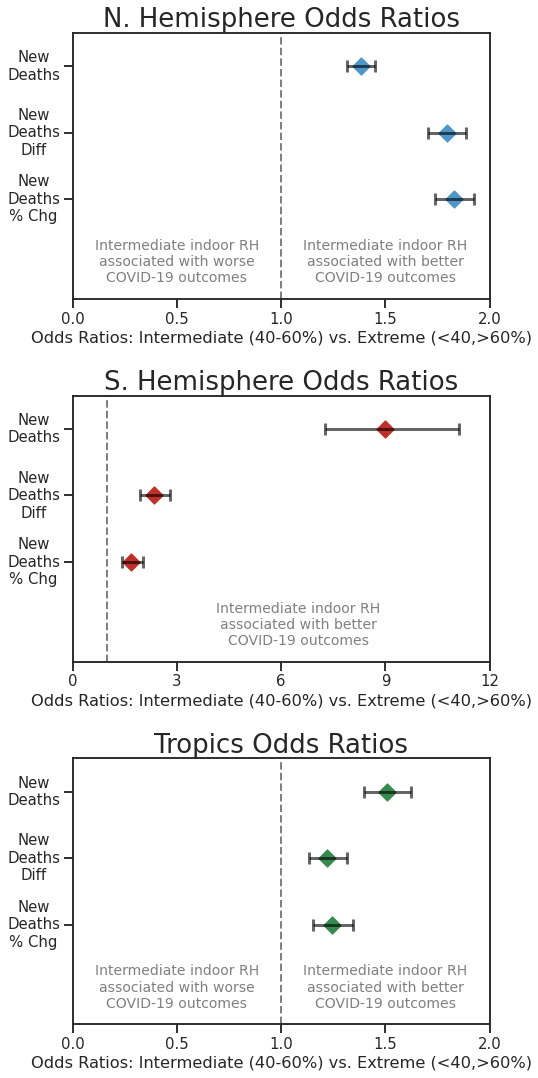

In [ ]:
# Set up the plotting 
quantized_outcomes = ['new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
dataset_names = ['NH','SH','Tro']

rows = len(dataset_names); cols = len(quantized_outcomes); fig,ax=plt.subplots(len(dataset_names),1,figsize=(7.5,15))

points = []; lines=[]
for region in range(len(dataset_names)):
  for outcome in range(len(quantized_outcomes)): 
    
    data_for_plotting = df_pooledORs_byregion.loc[(quantized_outcomes[outcome],dataset_names[region])]

    ax[region].errorbar(x=data_for_plotting['pooled_OR'],y=outcome,xerr=np.array([data_for_plotting['pooled_OR']-data_for_plotting['pooled_OR_lowerCI'],data_for_plotting['pooled_OR_upperCI']-data_for_plotting['pooled_OR']]).reshape(-1,1),capsize=6,capthick=3,elinewidth=3,ecolor='k',alpha=0.6,dash_capstyle='butt')
    points.append(ax[region].scatter(data_for_plotting['pooled_OR'],outcome,marker='D',color='k',alpha=1,s=140))
    ax[region].set_yticks(range(0,len(dataset_names)))
    ax[region].set_yticklabels(['New\nDeaths','New\nDeaths\nDiff','New\nDeaths\n% Chg'],ha='right', va='center',multialignment='center')

# [ax.set_xlabel('Odds Ratios \n [<40,>60] vs. [40-60]') for ax in plt.gcf().axes]
[ax.set_xlabel('Odds Ratios: Intermediate (40-60%) vs. Extreme (<40,>60%)') for ax in plt.gcf().axes]


ax[0].set_title('N. Hemisphere Odds Ratios', fontsize=26)
ax[1].set_title('S. Hemisphere Odds Ratios', fontsize=26)
ax[2].set_title('Tropics Odds Ratios', fontsize=26)

[points[i].set_color(sns.color_palette(palette='Blues_d',n_colors=4)[1]) for i in range(0,3)]
[points[i].set_color(sns.color_palette(palette='Reds_d',n_colors=4)[2]) for i in range(3,6)]
[points[i].set_color(sns.color_palette(palette='Greens_d',n_colors=4)[2]) for i in range(6,9)]

ax[0].set_xlim(0,2.1)
ax[1].set_xlim(0,11.5)
ax[2].set_xlim(0,1.75)

[ax.set_ylim(-.5,3.5) for ax in plt.gcf().axes]
ax[0].annotate('Intermediate indoor RH\nassociated with worse\nCOVID-19 outcomes',xy=[0.5,3.25],xycoords='data',fontsize=14,ha='center',color='grey')
ax[0].annotate('Intermediate indoor RH\nassociated with better\nCOVID-19 outcomes',xy=[1.5,3.25],xycoords='data',fontsize=14,ha='center',color='grey')
ax[1].annotate('Intermediate indoor RH\nassociated with better\nCOVID-19 outcomes',xy=[6.5,3.25],xycoords='data',fontsize=14,ha='center',color='grey')
ax[2].annotate('Intermediate indoor RH\nassociated with worse\nCOVID-19 outcomes',xy=[0.5,3.25],xycoords='data',fontsize=14,ha='center',color='grey')
ax[2].annotate('Intermediate indoor RH\nassociated with better\nCOVID-19 outcomes',xy=[1.5,3.25],xycoords='data',fontsize=14,ha='center',color='grey')

ax[0].set_xlim(0,2); ax[1].set_xlim(0,12); ax[2].set_xlim(0,2)
ax[0].set_xticks([0,0.5,1,1.5,2]); ax[1].set_xticks([0,3,6,9,12]); ax[2].set_xticks([0,0.5,1,1.5,2])

[ax.axvline(x=0,color='grey',alpha=0.0,linewidth=0) for ax in plt.gcf().axes]
[ax.axvline(x=1,linestyle='--',color='grey',alpha=1,linewidth=2) for ax in plt.gcf().axes]
[ax.invert_yaxis() for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5,h_pad=1.5,w_pad=0.5)

# Figure 5

### Break dataset into bins according to government response index 

In [ ]:
# Grab gov string stuff and put it in here -> compute mantel haenszel stuff and make a finalized table as the last figure -> even when controlling for government response you still see an effec t
# Also examine the outbreaks by government stringency -> how much worse are they when there's no gov response vs. when there's a high gov response 

first_day = 0; last_day = 120; gov_qlevels=3

# Make a lagged dataframe for government response 
df_for_gov_lagged = lagged_var_df(df7all,'Days From 5th Death','GovernmentResponseIndexForDisplay',28,COVIDstats)

# Cut the dataframe at the defined normalized timepoints 
df_for_gov = df_for_gov_lagged[(df_for_gov_lagged['Days From 5th Death'].ge(first_day)) & (df_for_gov_lagged['Days From 5th Death'].le(last_day)) & (df_for_gov_lagged['Country'].isin(df7all.Country.unique())) ].copy()

# Discretize the lagged government responses (bins)
df_for_gov['govresp_bins'] = pd.cut(df_for_gov['GovernmentResponseIndexForDisplay'],bins=gov_qlevels,retbins=False,labels=False)
df_for_gov['govresp_bins_lag7'] = pd.cut(df_for_gov['GovernmentResponseIndexForDisplay_lag7'],bins=gov_qlevels,retbins=False,labels=False)
df_for_gov['govresp_bins_lag14'] = pd.cut(df_for_gov['GovernmentResponseIndexForDisplay_lag14'],bins=gov_qlevels,retbins=False,labels=False)
df_for_gov['govresp_bins_lag21'] = pd.cut(df_for_gov['GovernmentResponseIndexForDisplay_lag21'],bins=gov_qlevels,retbins=False,labels=False)

# Add the lagged, discretized government response indices to the binarized treatment dataframe 
df_quantizedgov = pd.merge(binary_treatment, df_for_gov[['Country','Days From 5th Death','govresp_bins','govresp_bins_lag7','govresp_bins_lag14','govresp_bins_lag21']],on=['Country','Days From 5th Death'])


In [ ]:
# To get the quantization cutoffs for the time-varying govt resp stringency 
print('Time-varying government response stringency cutoffs')
pd.cut(df_for_gov['GovernmentResponseIndexForDisplay'],bins=gov_qlevels,retbins=True,labels=False)[1]

Time-varying government response stringency cutoffs


array([ 4.85165   , 35.3452381 , 65.74761905, 96.15      ])

### Get the value counts required for stratified contingency tables

In [ ]:
# Get the required contingency table frequencies for each of the lagged government stringency bins 

first_day = 0; last_day = 120; outbreak_qlevels=2
quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels'] # outbreak metrics 
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21'] # time-lagged humidity 
quantized_govbins = ['govresp_bins','govresp_bins_lag7','govresp_bins_lag14','govresp_bins_lag21'] # time-lagged gov stringency 
bin_levels = np.arange(0,gov_qlevels) # bin levels for government stringency 

level3 = []
for outcome in quantized_outcomes: 

  level2 = []
  for index in range(0,4): 

    humidity = quantized_humidities[index]
    govbin = quantized_govbins[index]

    level1 = [] 
    for level in bin_levels: 

      # Get a dataset where the time-lagged 'govbin' (e.g. govresp_bins_lag14) is equal to the defined 'level' (e.g. == 2)
      data = quantizer(dataframe=df_quantizedgov[df_quantizedgov[govbin]==level], first_day=first_day, last_day=last_day, qlevels=outbreak_qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
      #print(outcome, humidity, govbin, level)

      get_gov_freqs = get_freqs_for_contigs(dataset=data,outcome=outcome,treatment=humidity) 
      #print(get_gov_freqs)

      level1.append(get_gov_freqs) # Append the output tuple to the list 

    df_level1 = pd.DataFrame(level1, columns =['suboptimalRH_WorseOutcome','suboptimalRH_BetterOutcome','optimalRH_WorseOutcome','optimalRH_BetterOutcome'],index=bin_levels) # Put all outputs into a labeled dataframe

    level2.append(df_level1) # Put the labeled output dataframe (calculations for each region) into the list of dataframes in level 2 (calculations for each time-lagged humidity value) 
  
  df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe 

  level3.append(df_level2) # Put the multi-index dataframes (calcs for each region and each time-lag) into the list of dataframes in level 3(calculations for each COVID-19 outbreak metric) 

df_gov_freqs_for_contig = pd.concat(level3, keys=quantized_outcomes) # Put all of the multi-index dataframes into a final multi-index dataframe 

In [ ]:
# Get the pooled ORs and CIs and PValues for each time-lag for each outbreak metric 

quantized_outcomes = ['new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']

level2 = []
for outcome in quantized_outcomes: 

  level1 = []
  for level in bin_levels: 

    mat = np.asarray(df_gov_freqs_for_contig.xs([outcome,level],level=[0,2]))

    tables = [np.reshape(x.tolist(), (2, 2)) for x in mat]

    st = sm.stats.StratifiedTable(tables)

    level1.append(stratified_stats(st=st))

    #print(stratified_stats(st=st))

  df_level1 = pd.DataFrame(level1, columns =['pooled_OR', 'pooled_OR_lowerCI', 'pooled_OR_upperCI', 'breslow_day_pval', 'breslow_day_statistic', 'mantel_haenszel_pval', 'mantel_haenszel_statistic'],index=bin_levels) # Put all outputs into a labeled dataframe
  #print(df_level1)

  level2.append(df_level1)

df_level2 = pd.concat(level2,keys=quantized_outcomes)
df_level2

df_pooledORs_bygovstring = df_level2.copy()

In [ ]:
# To get the stats for the time-varying govt resp odds ratios 
df_pooledORs_bygovstring

pooled_OR  ...  mantel_haenszel_statistic
new_deaths_Qlevels           0   1.527073  ...                  19.158871
                             1   1.809871  ...                 322.283446
                             2   1.133192  ...                  23.965936
new_deaths_diff_Qlevels      0   2.242524  ...                  57.234428
                             1   1.657157  ...                 206.585810
                             2   1.373253  ...                 144.307442
new_deaths_pctchange_Qlevels 0   1.988763  ...                  43.823867
                             1   1.702608  ...                 224.612454
                             2   1.388082  ...                 152.779299

[9 rows x 7 columns]

In [ ]:
# To compare the stats to the bonferroni corrected significance level #df_pooledORs_bygovstring['mantel_haenszel_pval']<0.05/9

# Test results and p-value correction for multiple tests
from statsmodels.stats.multitest import multipletests

# pvalue correction for family-wise error rate (Bonferroni)
print('Family-wise error rate correction (Bonferroni)')
mult_tests = multipletests(df_pooledORs_bygovstring['mantel_haenszel_pval'].values,alpha=0.05,method='bonferroni')
print('\nReject?'); print(mult_tests[0])
print('\nCorrected p-values'); print(mult_tests[1])

# pvalue correction for false discovery rate (Benjamini/Hochberg)
print('\nFalse discovery rate correction (Benjamini/Hochberg)')
mult_tests = multipletests(df_pooledORs_bygovstring['mantel_haenszel_pval'].values,alpha=0.05,method='fdr_bh')
print('\nReject?'); print(mult_tests[0])
print('\nCorrected p-values'); print(mult_tests[1])

Family-wise error rate correction (Bonferroni)

Reject?
[ True  True  True  True  True  True  True  True  True]

Corrected p-values
[1.08249505e-04 0.00000000e+00 8.82497686e-06 3.47721851e-13
 0.00000000e+00 0.00000000e+00 3.23367333e-10 0.00000000e+00
 0.00000000e+00]

False discovery rate correction (Benjamini/Hochberg)

Reject?
[ True  True  True  True  True  True  True  True  True]

Corrected p-values
[1.20277228e-05 0.00000000e+00 1.10312211e-06 5.79536419e-14
 0.00000000e+00 0.00000000e+00 4.61953333e-11 0.00000000e+00
 0.00000000e+00]


### Stratify the dataset according to the average government stringency (computed over the span from normalized t0 to t120) 

In [ ]:
# Compute the average government response index for each country (from t0 to t120) 
avggov_qlevels = 3
avg_govresp = pd.cut(df7all[(df7all['Days From 5th Death'].ge(first_day)) & (df7all['Days From 5th Death'].le(last_day))].groupby('Country')['GovernmentResponseIndexForDisplay'].mean(),bins=avggov_qlevels,labels=False).reset_index().rename(columns={'GovernmentResponseIndexForDisplay':'Avg_GovRespIndex'})
df7all_with_avggovresp = pd.merge(df7all,avg_govresp,how='left',on='Country')

# Add the lagged, discretized government response indices to the binarized treatment dataframe 
df_avggov = pd.merge(binary_treatment, df7all_with_avggovresp[['Country','Days From 5th Death','Avg_GovRespIndex']],on=['Country','Days From 5th Death'])

In [ ]:
# To get the quantization cutoffs for the time-varying govt resp stringency 
print('Time-averaged government response stringency cutoffs')
pd.cut(df7all[(df7all['Days From 5th Death'].ge(first_day)) & (df7all['Days From 5th Death'].le(last_day))].groupby('Country')['GovernmentResponseIndexForDisplay'].mean(),bins=avggov_qlevels,retbins=True)[1]

Time-averaged government response stringency cutoffs


array([11.70420397, 37.04534435, 62.31068871, 87.57603306])

In [ ]:
# Get the required contingency table frequencies for each of the lagged government stringency bins 

first_day = 0; last_day = 120; outbreak_qlevels=2
quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels'] # outbreak metrics 
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21'] # time-lagged humidity 
quantized_govbins = ['govresp_bins','govresp_bins_lag7','govresp_bins_lag14','govresp_bins_lag21'] # time-lagged gov stringency 
bin_levels = np.arange(0,avggov_qlevels) # bin levels for government stringency 

level3 = []
for outcome in quantized_outcomes: 

  level2 = []
  for index in range(0,4): 

    humidity = quantized_humidities[index]
    govbin = quantized_govbins[index]

    level1 = [] 
    for level in bin_levels: 

      # Get a dataset where the time-lagged 'govbin' (e.g. govresp_bins_lag14) is equal to the defined 'level' (e.g. == 2)
      data = quantizer(dataframe=df_avggov[df_avggov['Avg_GovRespIndex']==level], first_day=first_day, last_day=last_day, qlevels=outbreak_qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
      #print(outcome, humidity, govbin, level)

      get_gov_freqs = get_freqs_for_contigs(dataset=data,outcome=outcome,treatment=humidity) 
      #print(get_gov_freqs)

      level1.append(get_gov_freqs) # Append the output tuple to the list 

    df_level1 = pd.DataFrame(level1, columns =['suboptimalRH_WorseOutcome','suboptimalRH_BetterOutcome','optimalRH_WorseOutcome','optimalRH_BetterOutcome'],index=bin_levels) # Put all outputs into a labeled dataframe

    level2.append(df_level1) # Put the labeled output dataframe (calculations for each region) into the list of dataframes in level 2 (calculations for each time-lagged humidity value) 
  
  df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe 

  level3.append(df_level2) # Put the multi-index dataframes (calcs for each region and each time-lag) into the list of dataframes in level 3(calculations for each COVID-19 outbreak metric) 

df_gov_freqs_for_contig_AVG = pd.concat(level3, keys=quantized_outcomes) # Put all of the multi-index dataframes into a final multi-index dataframe 

In [ ]:
# Check out the new df with frequencies based on average government response 
#df_gov_freqs_for_contig_AVG#.loc['new_deaths_Qlevels']

In [ ]:
# Get the pooled ORs and CIs and PValues for each time-lag for each outbreak metric 

quantized_outcomes = ['new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']

bin_levels = np.arange(0,avggov_qlevels) # bin levels for government stringency 


level2 = []
for outcome in quantized_outcomes: 

  level1 = []
  for level in bin_levels: 

    mat = np.asarray(df_gov_freqs_for_contig_AVG.xs([outcome,level],level=[0,2]))

    tables = [np.reshape(x.tolist(), (2, 2)) for x in mat]

    st = sm.stats.StratifiedTable(tables)

    level1.append(stratified_stats(st=st))

    #print(stratified_stats(st=st))

  df_level1 = pd.DataFrame(level1, columns =['pooled_OR', 'pooled_OR_lowerCI', 'pooled_OR_upperCI', 'breslow_day_pval', 'breslow_day_statistic', 'mantel_haenszel_pval', 'mantel_haenszel_statistic'],index=bin_levels) # Put all outputs into a labeled dataframe
  #print(df_level1)

  level2.append(df_level1)

df_level2 = pd.concat(level2,keys=quantized_outcomes)
df_level2

df_pooledORs_bygovstringAVG = df_level2.copy()

In [ ]:
# To get the stats for the averaged govt resp ORs
df_pooledORs_bygovstringAVG

pooled_OR  ...  mantel_haenszel_statistic
new_deaths_Qlevels           0   1.470541  ...                  15.129859
                             1   1.875420  ...                 237.382922
                             2   1.350249  ...                 167.054494
new_deaths_diff_Qlevels      0   1.434724  ...                   9.559067
                             1   1.607559  ...                 116.607217
                             2   1.551403  ...                 337.362535
new_deaths_pctchange_Qlevels 0   1.452336  ...                   9.743934
                             1   1.623562  ...                 119.812193
                             2   1.579161  ...                 361.152665

[9 rows x 7 columns]

In [ ]:
# To compare the stats to the bonferroni corrected significance level #df_pooledORs_bygovstringAVG['mantel_haenszel_pval']<0.05/9

# Test results and p-value correction for multiple tests
from statsmodels.stats.multitest import multipletests

# pvalue correction for family-wise error rate (Bonferroni)
print('Family-wise error rate correction (Bonferroni)')
mult_tests = multipletests(df_pooledORs_bygovstringAVG['mantel_haenszel_pval'].values,alpha=0.05,method='bonferroni')
print('\nReject?'); print(mult_tests[0])
print('\nCorrected p-values'); print(mult_tests[1])

# pvalue correction for false discovery rate (Benjamini/Hochberg)
print('\nFalse discovery rate correction (Benjamini/Hochberg)')
mult_tests = multipletests(df_pooledORs_bygovstringAVG['mantel_haenszel_pval'].values,alpha=0.05,method='fdr_bh')
print('\nReject?'); print(mult_tests[0])
print('\nCorrected p-values'); print(mult_tests[1])

Family-wise error rate correction (Bonferroni)

Reject?
[ True  True  True  True  True  True  True  True  True]

Corrected p-values
[0.00090327 0.         0.         0.01790677 0.         0.
 0.01619239 0.         0.        ]

False discovery rate correction (Benjamini/Hochberg)

Reject?
[ True  True  True  True  True  True  True  True  True]

Corrected p-values
[0.00012904 0.         0.         0.00198964 0.         0.
 0.00198964 0.         0.        ]


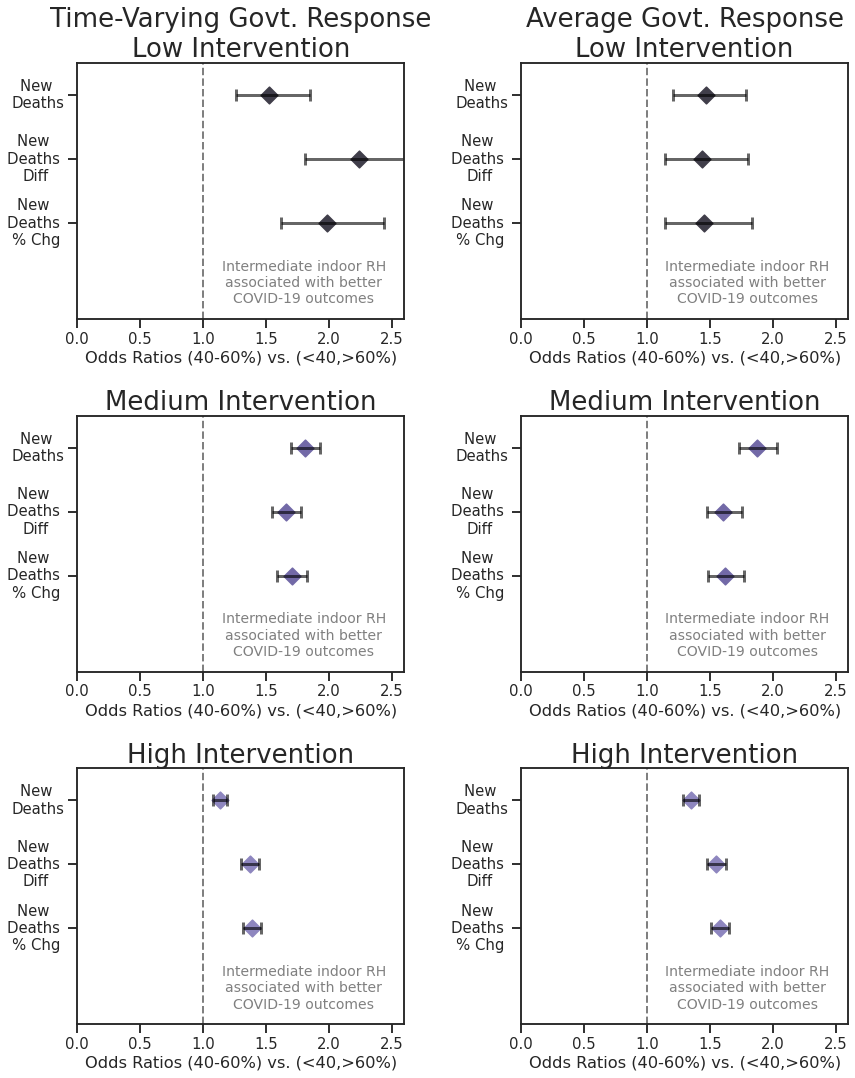

In [ ]:
# Set up the plotting 
quantized_outcomes = ['new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
bin_levels = np.arange(0,gov_qlevels) # bin levels for government stringency 

rows = len(bin_levels); cols = len(quantized_outcomes); fig,ax=plt.subplots(len(bin_levels),2,figsize=(12,15))

points = []; points2 = []; lines=[]
for region in range(len(bin_levels)):
  for outcome in range(len(quantized_outcomes)): 
    
    data_for_plotting = df_pooledORs_bygovstring.loc[(quantized_outcomes[outcome],bin_levels[region])]

    ax[region,0].errorbar(x=data_for_plotting['pooled_OR'],y=outcome,xerr=np.array([data_for_plotting['pooled_OR']-data_for_plotting['pooled_OR_lowerCI'],data_for_plotting['pooled_OR_upperCI']-data_for_plotting['pooled_OR']]).reshape(-1,1),capsize=6,capthick=3,elinewidth=3,ecolor='k',alpha=0.6,dash_capstyle='butt')
    points.append(ax[region,0].scatter(data_for_plotting['pooled_OR'],outcome,marker='D',color='k',alpha=1,s=140))
    ax[region,0].set_yticks(range(0,len(bin_levels)))
    ax[region,0].set_yticklabels(['New \nDeaths','New \nDeaths \nDiff','New \nDeaths \n% Chg'],ha='right', va='center',multialignment='center')


    data_for_plotting = df_pooledORs_bygovstringAVG.loc[(quantized_outcomes[outcome],bin_levels[region])]

    ax[region,1].errorbar(x=data_for_plotting['pooled_OR'],y=outcome,xerr=np.array([data_for_plotting['pooled_OR']-data_for_plotting['pooled_OR_lowerCI'],data_for_plotting['pooled_OR_upperCI']-data_for_plotting['pooled_OR']]).reshape(-1,1),capsize=6,capthick=3,elinewidth=3,ecolor='k',alpha=0.6,dash_capstyle='butt')
    points2.append(ax[region,1].scatter(data_for_plotting['pooled_OR'],outcome,marker='D',color='k',alpha=1,s=140))
    ax[region,1].set_yticks(range(0,len(bin_levels)))
    ax[region,1].set_yticklabels(['New \nDeaths','New \nDeaths \nDiff','New \nDeaths \n% Chg'],ha='right', va='center',multialignment='center')


ax[0,0].set_title('Time-Varying Govt. Response\nLow Intervention', fontsize=26); ax[1,0].set_title('Medium Intervention', fontsize=26); ax[2,0].set_title('High Intervention', fontsize=26)
ax[0,1].set_title('Average Govt. Response\nLow Intervention', fontsize=26); ax[1,1].set_title('Medium Intervention', fontsize=26); ax[2,1].set_title('High Intervention', fontsize=26)

[points[i].set_color(sns.color_palette(palette='Purples_d',n_colors=10)[9]) for i in range(0,3)]; [points[i].set_color(sns.color_palette(palette='Purples_d',n_colors=10)[5]) for i in range(3,6)]; [points[i].set_color(sns.color_palette(palette='Purples_d',n_colors=10)[3]) for i in range(6,9)]
[points2[i].set_color(sns.color_palette(palette='Purples_d',n_colors=10)[9]) for i in range(0,3)]; [points2[i].set_color(sns.color_palette(palette='Purples_d',n_colors=10)[5]) for i in range(3,6)]; [points2[i].set_color(sns.color_palette(palette='Purples_d',n_colors=10)[3]) for i in range(6,9)]

[ax.set_xlabel('Odds Ratios (40-60%) vs. (<40,>60%)') for ax in plt.gcf().axes]
[ax.set_xlim(0,2.6) for ax in plt.gcf().axes]
[ax.set_xticks([0,0.5,1,1.5,2,2.5]) for ax in plt.gcf().axes]

#[ax.set_ylim(-.5,2.5) for ax in plt.gcf().axes]
[ax.set_ylim(-.5,3.5) for ax in plt.gcf().axes]
#ax[0,0].annotate('Intermediate indoor RH\nassociated with worse\nCOVID-19 outcomes',xy=[0.5,3.25],xycoords='data',fontsize=14,ha='center',color='grey')
[ax.annotate('Intermediate indoor RH\nassociated with better\nCOVID-19 outcomes',xy=[1.8,3.25],xycoords='data',fontsize=14,ha='center',color='grey') for ax in plt.gcf().axes]
#[ax.tick_params(axis="y",direction="in", pad=-80) for ax in plt.gcf().axes]


[ax.axvline(x=0,color='grey',alpha=0.0,linewidth=0) for ax in plt.gcf().axes]
[ax.axvline(x=1,linestyle='--',color='grey',alpha=1,linewidth=2) for ax in plt.gcf().axes]
[ax.invert_yaxis() for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5,h_pad=1.5,w_pad=0.5)

In [ ]:
# Create a dataframe with lagged indoor humidity (from 0 days of lag up to 28 days of lag)
COVIDstats = ['Country','Days From 5th Death','total_cases', 'total_cases_per_million', 'new_cases', # Add country and date so there can be correct merging on keys 
       'new_cases_per_million', 'total_deaths', 'total_deaths_per_million',
       'total_deaths_pctchange', 'total_deaths_per_million_pctchange',
       'new_deaths', 'new_deaths_per_million', 'new_deaths_diff',
       'new_deaths_per_million_diff', 'new_deaths_pctchange',
       'new_deaths_per_million_pctchange']

# List of other weather variables to look at... 
other_weather_vars = ['DailyTemp_C', 'Daily_UV', 'DailyRH_pct', 'DailyAH_gperm3']

# Dataframes with lagged variables 
df7all_lag_temp = lagged_var_df(df7all,'Days From 5th Death','DailyTemp_C',28,COVIDstats)
df7all_lag_uv = lagged_var_df(df7all,'Days From 5th Death','Daily_UV',28,COVIDstats)
df7all_lag_RH = lagged_var_df(df7all,'Days From 5th Death','DailyRH_pct',28,COVIDstats)
df7all_lag_AH = lagged_var_df(df7all,'Days From 5th Death','DailyAH_gperm3',28,COVIDstats)

In [ ]:
# List of lagged dataframes with other weather variables to look at... 
lagged_other_weather_vars = [df7all_lag_temp, df7all_lag_uv,df7all_lag_RH,df7all_lag_AH]

In [ ]:
# Create a dataframe with lagged indoor humidity (from 0 days of lag up to 28 days of lag)
COVIDstats = ['Country','Days From 5th Death','total_cases', 'total_cases_per_million', 'new_cases', # Add country and date so there can be correct merging on keys 
       'new_cases_per_million', 'total_deaths', 'total_deaths_per_million',
       'total_deaths_pctchange', 'total_deaths_per_million_pctchange',
       'new_deaths', 'new_deaths_per_million', 'new_deaths_diff',
       'new_deaths_per_million_diff', 'new_deaths_pctchange',
       'new_deaths_per_million_pctchange']

df7all_lag_indrh = lagged_var_df(df7all,'Days From 5th Death','IndoorRH_pct',28,COVIDstats)

# Discretize the treatment  
bins = [0,40,60,100] # How to break up the continuous variable (0-40),(40-60),(60-100)
labels = [0,1,2] # How to label the bins 
df7all_lag_indrh['quantized_IndRH'] = pd.cut(df7all_lag_indrh['IndoorRH_pct'],bins=bins,labels=labels) # Use cut to break up the continuous data 
df7all_lag_indrh['quantized_IndRH_lag7'] = pd.cut(df7all_lag_indrh['IndoorRH_pct_lag7'],bins=bins,labels=labels) # Use cut to break up the continuous data 
df7all_lag_indrh['quantized_IndRH_lag14'] = pd.cut(df7all_lag_indrh['IndoorRH_pct_lag14'],bins=bins,labels=labels) # Use cut to break up the continuous data 
df7all_lag_indrh['quantized_IndRH_lag21'] = pd.cut(df7all_lag_indrh['IndoorRH_pct_lag21'],bins=bins,labels=labels) # Use cut to break up the continuous data 

# Binarize the treatment (so <40 and >60 are untreated, 40-60 are treated) 
binary_treatment = df7all_lag_indrh.copy()
binary_treatment.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']] = binary_treatment.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']].replace(2,0)

### Make dataframes with lagged outdoor weather variables, quantized into either 0 (lower half) or 1 (upper half) by partitioning the dataset at the median value

In [ ]:
# List of lagged dataframes with other weather variables to look at... 
lagged_other_weather_vars = [df7all_lag_temp, df7all_lag_uv,df7all_lag_RH,df7all_lag_AH]

# List of suffixes to add to the dataframe name... 
suffixes = ['Temp','UV','RH','AH']

dict_stratify_by_weather = {} # Dictionary to hold all of the labeled dataframes 
for i in np.arange(0,len(suffixes)):

  df7all_lag_VARIABLE = lagged_other_weather_vars[i]
  first_day = 0; last_day = 120;
  df7all_lag = df7all_lag_VARIABLE[(df7all_lag_VARIABLE['Days From 5th Death'].ge(first_day)) & (df7all_lag_VARIABLE['Days From 5th Death'].le(last_day))].copy()

  treatment_qlevels = 2
  # Discretize the treatment  
  df7all_lag['weather_bins'] = pd.qcut(df7all_lag[df7all_lag.columns[2]],q=treatment_qlevels,labels=False) # Use qcut to break up the continuous data 
  df7all_lag['weather_bins_lag7'] = pd.qcut(df7all_lag[df7all_lag.columns[2]+'_lag7'],q=treatment_qlevels,labels=False) # Use qcut to break up the continuous data 
  df7all_lag['weather_bins_lag14'] = pd.qcut(df7all_lag[df7all_lag.columns[2]+'_lag14'],q=treatment_qlevels,labels=False) # Use qcut to break up the continuous data 
  df7all_lag['weather_bins_lag21'] = pd.qcut(df7all_lag[df7all_lag.columns[2]+'_lag21'],q=treatment_qlevels,labels=False) # Use qcut to break up the continuous data 

  # Add the lagged, discretized weather variables to the binarized treatment dataframe 
  df_stratify_by_weather = pd.merge(binary_treatment, df7all_lag[['Country','Days From 5th Death',df7all_lag.columns[2],df7all_lag.columns[2]+'_lag7',df7all_lag.columns[2]+'_lag14',df7all_lag.columns[2]+'_lag21','weather_bins','weather_bins_lag7','weather_bins_lag14','weather_bins_lag21']],on=['Country','Days From 5th Death'])

  dict_stratify_by_weather[suffixes[i]] = df_stratify_by_weather

In [ ]:
# To get the quantization cutoff points for the outdoor weather variable stratification 
for i in np.arange(0,len(suffixes)):

  print('Outdoor weather variable =',suffixes[i],'\n')

  df7all_lag_VARIABLE = lagged_other_weather_vars[i]
  first_day = 0; last_day = 120;
  df7all_lag = df7all_lag_VARIABLE[(df7all_lag_VARIABLE['Days From 5th Death'].ge(first_day)) & (df7all_lag_VARIABLE['Days From 5th Death'].le(last_day))].copy()

  treatment_qlevels = 2
  # Discretize the treatment  
  print('No lag =',pd.qcut(df7all_lag[df7all_lag.columns[2]],q=treatment_qlevels,retbins=True)[1])
  print('1wk lag =',pd.qcut(df7all_lag[df7all_lag.columns[2]+'_lag7'],q=treatment_qlevels,retbins=True)[1])
  print('2wk lag =',pd.qcut(df7all_lag[df7all_lag.columns[2]+'_lag14'],q=treatment_qlevels,retbins=True)[1])
  print('3wk lag =',pd.qcut(df7all_lag[df7all_lag.columns[2]+'_lag21'],q=treatment_qlevels,retbins=True)[1],'\n')

Outdoor weather variable = Temp 

No lag = [-13.2295121   22.48436599  43.73838268]
1wk lag = [-13.2295121   22.30465815  43.73838268]
2wk lag = [-13.2295121   22.04119117  42.66330072]
3wk lag = [-17.39910918  21.68532861  42.66330072] 

Outdoor weather variable = UV 

No lag = [ 15253.86682 121700.9613  215604.6801 ]
1wk lag = [ 15253.86682 121289.5588  215604.6801 ]
2wk lag = [ 15722.00372 120881.8229  215604.6801 ]
3wk lag = [ 15722.00372 120031.0547  215604.6801 ] 

Outdoor weather variable = RH 

No lag = [ 7.62774051 62.46838848 93.82401197]
1wk lag = [ 7.34556553 62.29616014 93.82401197]
2wk lag = [ 7.34556553 62.34447538 92.98768562]
3wk lag = [ 7.34556553 62.6357884  93.89047299] 

Outdoor weather variable = AH 

No lag = [ 1.24614434  9.94944032 29.13219672]
1wk lag = [ 1.24614434  9.64516276 28.59026692]
2wk lag = [ 1.24614434  9.32638971 28.31919069]
3wk lag = [ 0.97551168  8.97144733 26.89742694] 



### Get the value counts required for stratified contingency tables

In [ ]:
first_day = 0; last_day = 120; outbreak_qlevels=2; control_qlevels = 2
quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels'] # binary outbreak outcomes 
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21'] # time-lagged binary humidity 
quantized_weather_controls = ['weather_bins','weather_bins_lag7','weather_bins_lag14','weather_bins_lag21'] # time-lagged binary outdoor weather variables 


level4 = []
for key in dict_stratify_by_weather.keys(): # Go through each of the dataframes stored in the dictionary (binary temp, binary UV, binary RH, binary AH) -> stratify the data by these levels and compare the indoor RH within each of these strata to see if there's still an effect of intermediate RH
  
  dataset = dict_stratify_by_weather[key] # Grab the dataframe designated by the key

  level3 = []
  for outcome in quantized_outcomes: # Go through each of the binary outcomes (new cases, new deaths, new deaths diff, new deaths pct change) 

    level2 = []
    for lag in range(0,len(quantized_humidities)): # Go through each of the time-lags for the treatment and control variables (0days, 7days, 14days, 21days) 

      humidity = quantized_humidities[lag]
      control = quantized_weather_controls[lag]

      level1 = []
      for stratum in range(0,control_qlevels): # Go through each of the strata in the binary control variable (0,1)

        # Get a dataset where the time-lagged control is equal to the defined stratum (e.g. where 'weather_bins_lag7' == 0) 
        data = quantizer(dataframe=dataset[dataset[control]==stratum], first_day=first_day, last_day=last_day, qlevels=outbreak_qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
        #print(key,outcome, humidity, control, stratum)

        get_2x2_counts = get_freqs_for_contigs(dataset=data,outcome=outcome,treatment=humidity) 
        #print(get_2x2_counts)

        level1.append(get_2x2_counts) # Append the output tuple to the list 

      df_level1 = pd.DataFrame(level1, columns =['suboptimalRH_WorseOutcome','suboptimalRH_BetterOutcome','optimalRH_WorseOutcome','optimalRH_BetterOutcome'],index=range(0,control_qlevels)) # Put all outputs into a labeled dataframe, with 0 = lower half of control weather variable and 1 = upper half of control weather variable

      level2.append(df_level1) # Append the output dataframe to the list 
    
    df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe, with each of the time-lagged binary humidity values (treatments) as the outer indices 

    level3.append(df_level2) # Append the output dataframe to the list 

  df_level3 = pd.concat(level3, keys=quantized_outcomes) # Put all dfs into a multi-index dataframe, with each of the binary outbreak metrics (outcomes) as the outer indices 

  level4.append(df_level3) # Append the output dataframe to the list 

df_weather_freqs_for_contig = pd.concat(level4, keys=dict_stratify_by_weather.keys()) # Put all dfs into a multi-index dataframe, with each of the outdoor weather variables (controls) as the outer indices 

### Get the common odds ratios by pooling the time-lags for each stratum for each outcome for each of the different outdoor weather variables

In [ ]:
# Get the pooled ORs and CIs and PValues for each time-lag for each outbreak metric 

quantized_outcomes = ['new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']

treatment_qlevels = 2
bin_levels = np.arange(0,treatment_qlevels) # bin levels for government stringency 

level3 = []
for key in dict_stratify_by_weather.keys():

  level2 = []
  for outcome in quantized_outcomes: 

    level1 = []
    for level in bin_levels: 

      mat = np.asarray(df_weather_freqs_for_contig.xs([key,outcome,level],level=[0,1,3]))

      tables = [np.reshape(x.tolist(), (2, 2)) for x in mat]

      st = sm.stats.StratifiedTable(tables)

      level1.append(stratified_stats(st=st))

      #print(stratified_stats(st=st))

    df_level1 = pd.DataFrame(level1, columns =['pooled_OR', 'pooled_OR_lowerCI', 'pooled_OR_upperCI', 'breslow_day_pval', 'breslow_day_statistic', 'mantel_haenszel_pval', 'mantel_haenszel_statistic'],index=bin_levels) # Put all outputs into a labeled dataframe
    level2.append(df_level1)

  df_level2 = pd.concat(level2,keys=quantized_outcomes)
  level3.append(df_level2)

df_level3 = pd.concat(level3,keys=dict_stratify_by_weather.keys())

df_pooled_ORs_byweather = df_level3.copy()
#df_pooled_ORs_byweather

### Plot the pooled ORs

In [ ]:
# # To get the stats for the outdoor weather ORs
df_pooled_ORs_byweather

pooled_OR  ...  mantel_haenszel_statistic
Temp new_deaths_Qlevels           0   1.694767  ...                 431.370406
                                  1   1.075127  ...                   5.089739
     new_deaths_diff_Qlevels      0   1.888993  ...                 579.873658
                                  1   1.135612  ...                  14.620170
     new_deaths_pctchange_Qlevels 0   1.933398  ...                 616.851889
                                  1   1.152558  ...                  17.953323
UV   new_deaths_Qlevels           0   1.349494  ...                 109.660684
                                  1   1.081291  ...                   8.690424
     new_deaths_diff_Qlevels      0   1.796515  ...                 383.420254
                                  1   1.252537  ...                  65.366430
     new_deaths_pctchange_Qlevels 0   1.815112  ...                 393.177690
                                  1   1.272458  ...                  73.647575
RH   new_deaths_Qlevels           0   1.624259  ...                 344.290827
                                  1   1.096620  ...                   9.724433
     new_deaths_diff_Qlevels      0   1.372914  ...                 139.063825
                                  1   1.743903  ...                 307.372545
     new_deaths_pctchange_Qlevels 0   1.409474  ...                 161.098920
                                  1   1.744762  ...                 303.944303
AH   new_deaths_Qlevels           0   1.273128  ...                  73.867342
                                  1   1.182690  ...                  38.833536
     new_deaths_diff_Qlevels      0   1.695132  ...                 324.135162
                                  1   1.339684  ...                 106.725752
     new_deaths_pctchange_Qlevels 0   1.715731  ...                 336.109495
                                  1   1.360589  ...                 116.325941

[24 rows x 7 columns]

In [ ]:
# To compare the stats to the bonferroni corrected significance level # df_pooled_ORs_byweather['mantel_haenszel_pval']<0.05/24


# Test results and p-value correction for multiple tests
from statsmodels.stats.multitest import multipletests

# pvalue correction for family-wise error rate (Bonferroni)
print('Family-wise error rate correction (Bonferroni)')
mult_tests = multipletests(df_pooled_ORs_byweather['mantel_haenszel_pval'].values,alpha=0.05,method='bonferroni')
print('\nReject?'); print(mult_tests[0])
print('\nCorrected p-values'); print(mult_tests[1])

# pvalue correction for false discovery rate (Benjamini/Hochberg)
print('\nFalse discovery rate correction (Benjamini/Hochberg)')
mult_tests = multipletests(df_pooled_ORs_byweather['mantel_haenszel_pval'].values,alpha=0.05,method='fdr_bh')
print('\nReject?'); print(mult_tests[0])
print('\nCorrected p-values'); print(mult_tests[1])

Family-wise error rate correction (Bonferroni)

Reject?
[ True False  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]

Corrected p-values
[0.00000000e+00 5.77627631e-01 0.00000000e+00 3.15598866e-03
 0.00000000e+00 5.43333144e-04 0.00000000e+00 7.67726790e-02
 0.00000000e+00 1.59872116e-14 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.36402478e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.10767209e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]

False discovery rate correction (Benjamini/Hochberg)

Reject?
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]

Corrected p-values
[0.00000000e+00 2.40678180e-02 0.00000000e+00 1.50285174e-04
 0.00000000e+00 2.71666572e-05 0.00000000e+00 3.33794256e-03
 0.00000000e+00 8.88178420e-16 0.00000000e+00 0.00000000e+

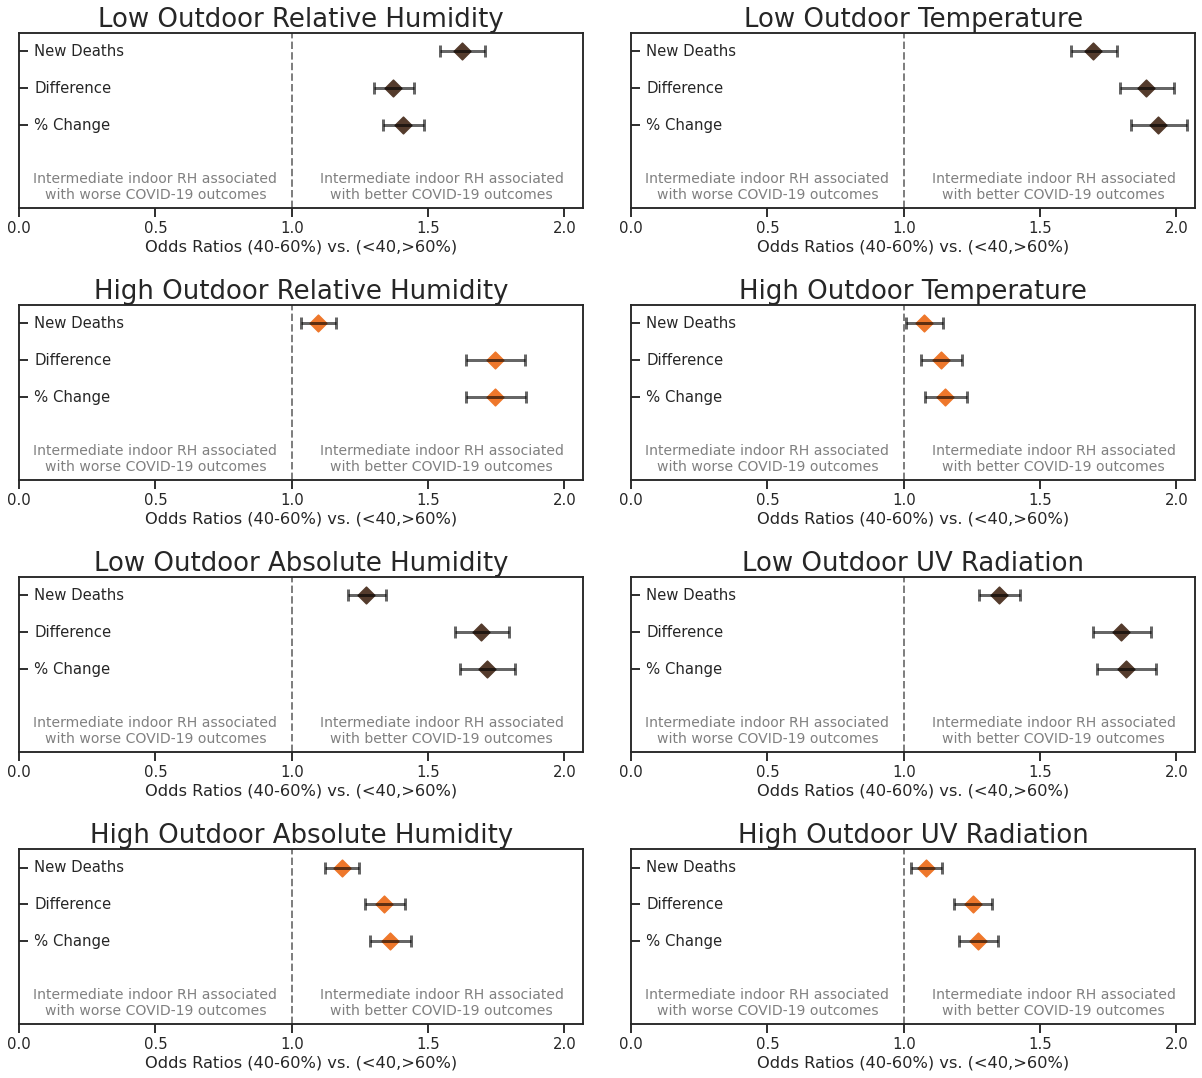

In [ ]:
# Set up the plotting 
quantized_outcomes = ['new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
keys = dict_stratify_by_weather.keys()
keys_list = ['RH','Temp','AH','UV'] # Manually make the list because you can't index the dict keys with integer values

rows = 4; cols = 2; fig,ax=plt.subplots(rows,cols,figsize=(17,15))

points = []; lines=[]

for col in range(0,2): # Fill in first column, then fill in second column

  for row in range(0,2): # Fill in top row (low condition, rows 0 and 2), then fill in bottom row (high condition, rows 1 and 3)

    for outcome in range(len(quantized_outcomes)):
      
      # First set of plots (RH, Temp)
      data_for_plotting = df_pooled_ORs_byweather.loc[(keys_list[col],quantized_outcomes[outcome],row)]

      ax[row,col].errorbar(x=data_for_plotting['pooled_OR'],y=outcome,xerr=np.array([data_for_plotting['pooled_OR']-data_for_plotting['pooled_OR_lowerCI'],data_for_plotting['pooled_OR_upperCI']-data_for_plotting['pooled_OR']]).reshape(-1,1),capsize=6,capthick=3,elinewidth=3,ecolor='k',alpha=0.6,dash_capstyle='butt')
      points.append(ax[row,col].scatter(data_for_plotting['pooled_OR'],outcome,marker='D',color='k',alpha=1,s=140))
      ax[row,col].set_yticks(range(0,len(quantized_outcomes)))
      #ax[row,col].set_yticklabels(['New Deaths','New Deaths Diff','New Deaths % Chg'],ha='left', va='center',multialignment='center')
      ax[row,col].set_yticklabels(['New Deaths','Difference','% Change'],ha='left', va='center',multialignment='center')
      ax[row,col].set_title(keys_list[col])

      # Second set of plots (AH, UV)
      data_for_plotting = df_pooled_ORs_byweather.loc[(keys_list[col+2],quantized_outcomes[outcome],row)]

      ax[row+2,col].errorbar(x=data_for_plotting['pooled_OR'],y=outcome,xerr=np.array([data_for_plotting['pooled_OR']-data_for_plotting['pooled_OR_lowerCI'],data_for_plotting['pooled_OR_upperCI']-data_for_plotting['pooled_OR']]).reshape(-1,1),capsize=6,capthick=3,elinewidth=3,ecolor='k',alpha=0.6,dash_capstyle='butt')
      points.append(ax[row+2,col].scatter(data_for_plotting['pooled_OR'],outcome,marker='D',color='k',alpha=1,s=140))
      ax[row+2,col].set_yticks(range(0,len(quantized_outcomes)))
      #ax[row+2,col].set_yticklabels(['New Deaths','New Deaths Diff','New Deaths % Chg'],ha='left', va='center',multialignment='center')
      ax[row+2,col].set_yticklabels(['New Deaths','Difference','% Change'],ha='left', va='center',multialignment='center')
      ax[row+2,col].set_title(keys_list[col+2])

[points[i].set_color(sns.color_palette(palette='Oranges_d',n_colors=10)[9]) for i in range(0,6)]
[points[i].set_color(sns.color_palette(palette='Oranges_d',n_colors=10)[3]) for i in range(6,12)]
[points[i].set_color(sns.color_palette(palette='Oranges_d',n_colors=10)[9]) for i in range(12,18)]
[points[i].set_color(sns.color_palette(palette='Oranges_d',n_colors=10)[3]) for i in range(18,24)]

ax[0,0].set_title('Low Outdoor Relative Humidity', fontsize=26); ax[1,0].set_title('High Outdoor Relative Humidity', fontsize=26)
ax[0,1].set_title('Low Outdoor Temperature', fontsize=26); ax[1,1].set_title('High Outdoor Temperature', fontsize=26)
ax[2,0].set_title('Low Outdoor Absolute Humidity', fontsize=26); ax[3,0].set_title('High Outdoor Absolute Humidity', fontsize=26)
ax[2,1].set_title('Low Outdoor UV Radiation', fontsize=26); ax[3,1].set_title('High Outdoor UV Radiation', fontsize=26)

[ax.set_xlim(0,2.07) for ax in plt.gcf().axes]
[ax.set_xticks([0,0.5,1,1.5,2]) for ax in plt.gcf().axes]
[ax.set_xlabel('Odds Ratios (40-60%) vs. (<40,>60%)') for ax in plt.gcf().axes]

[ax.tick_params(axis="y",direction="in", pad=-15) for ax in plt.gcf().axes]

#[ax.set_ylim(-.5,2.5) for ax in plt.gcf().axes]
[ax.set_ylim(-.5,4.25) for ax in plt.gcf().axes]
[ax.annotate('Intermediate indoor RH associated\nwith worse COVID-19 outcomes',xy=[0.5,4],xycoords='data',fontsize=14,ha='center',color='grey') for ax in plt.gcf().axes]
[ax.annotate('Intermediate indoor RH associated\nwith better COVID-19 outcomes',xy=[1.55,4],xycoords='data',fontsize=14,ha='center',color='grey') for ax in plt.gcf().axes]


[ax.axvline(x=0,color='grey',alpha=0.0,linewidth=0) for ax in plt.gcf().axes]
[ax.axvline(x=1,linestyle='--',color='grey',alpha=1,linewidth=2) for ax in plt.gcf().axes]
[ax.invert_yaxis() for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5,h_pad=1.5,w_pad=1)